# Exploratory Data Analysis

This notebook deals with exploring, understanding, and summarizing the 'Telco Customer Churn' dataset provided by IBM before modeling. It aims to solve the following questions:
1. What does the data look like?
2. What patterns, relationships, or trends are present?
3. Are there any errors, missing values, or outliers?
4. What might influence the target variable (Churn)?

## 1. Importing the Libraries and Dataset

### 1.1. Loading the libraries

In [1]:
# Imports 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import os

### 1.2.  Importing the dataset

In [2]:
# Load dataset 
file_path = '../data/telco_customer_churn_eda.csv' 

# Check if the file exists
if os.path.isfile(file_path):
    dataset = pd.read_csv(file_path)

    # Save an untouched copy
    dataset_original = dataset.copy()

    # Save as file
    dataset_original.to_csv('../data/telco_customer_churn_eda_copy.csv', index=False)
else:
    raise FileNotFoundError(f"The file was not found at {file_path}")


# Display the first 10 rows 
dataset.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## 2. Understanding the Structure of the Dataset

This section will analyse various aspects of the dataset such as: its size, variables, the data types of the variables and check for any anomalies within the data.

### 2.1. Checking the shape of the dataset and data types of the variables

In [3]:
# Determine the shape 
dataset.shape

(7043, 21)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dataset has 7043 rows and 21 columns with three columns being of the numerical type

**<u>Key Observations</u>**
- Most columns are 'object':

- These contain categorical data like 'Yes', 'No', 'Male', 'Female', 'DSL', 'No internet service', etc.

    - Example: gender, PaymentMethod, Contract

- SeniorCitizen is 'int64':

    - It contains values like 0 and 1 — a numeric representation of binary categories (e.g., 0 = No, 1 = Yes).

- tenure is 'int64':

    - A numeric column representing how long the customer has been with the company (e.g., number of months).

- MonthlyCharges is 'float64':

    - A true numeric column with decimal values.

- TotalCharges is 'object' but should be numeric:

    - TotalCharges should likely be a float, but it's stored as an object. That means:

    - There might be some missing or bad data (e.g., empty strings or spaces).





**<u>Suggestions for Modelling Stage</u>**
- TotalCharges may need to be cleaned and converted.
- Columns with the dtype 'object' will need to be encoded.

### 2.2. Converting 'TotalCharges' to numeric form

NB: This is being implemented during this stage for analysis purposes.

In [5]:
# Convert TotalCharges to numeric, coercing errors 
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

print("The data type of 'TotalCharges: ", dataset['TotalCharges'].dtypes)

The data type of 'TotalCharges:  float64


In [6]:
numerical = dataset.select_dtypes(include=['number']).columns
categorical = dataset.select_dtypes(include=['object']).columns

print("Numerical columns:\n", numerical)
print("\nCategorical columns:\n", categorical)

Numerical columns:
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

Categorical columns:
 Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


'TotalCharges' is now a numeric column.

## 3. Analysing the Target Column 'Churn'

This section will look at the distribution of the target variable 'Churn' to determine if there are any class imbalances that need to be addressed before or during modelling.

### 3.1. Determining the unique values of the target column

In [7]:
# Determine the unique values of the target column 
print(f"Unique values in 'Churn':", dataset['Churn'].unique())

Unique values in 'Churn': ['No' 'Yes']


**<u>Key Observation</u>**

The unique values in the target column are:

- "No", which is the value assigned to the customers that did not churn (they stayed with the company).
- "Yes", which is the value assigned to the customers that did churn (they left the company).

Hence, this will be a binary classification problem. The task now is to predict whether a customer will churn (Yes) or not (No).

### 3.2. Checking if the classes are balanced

In [8]:
# Determine if the classes are balanced or unbalanced

value_count = dataset['Churn'].value_counts()

# Calculate the percentages 
percentages = dataset['Churn'].value_counts(normalize=True) * 100

# Arrange data in a table 
churn_distribution_table = pd.DataFrame({
    'Label': value_count.index,
    'Count': value_count.values,
    'Percentage': percentages.values.round(1).astype(str) + '%'
})

# Display the table 
display(churn_distribution_table)

,Label,Count,Percentage
0,No,5174,73.5%
1,Yes,1869,26.5%


**<u>Interpretation of Results</u>**
- Total customers: 7043 customers
- 5174 customers did not churn ("No") - which is about 73.5%.
- 1869 customers did churn ("Yes") - which is about 26.5%.

**<u>Key Observations and Suggestions for Modelling</u>**
- The classes are imbalanced — there are much more customers that did not churn "No" than customers who did "Yes" responses.
- The imbalance isn't extreme, but it's something to be aware of in modeling.
- The models may favor the majority class ("No") if not handled properly.

### 3.3. Visualising the 'Churn' column

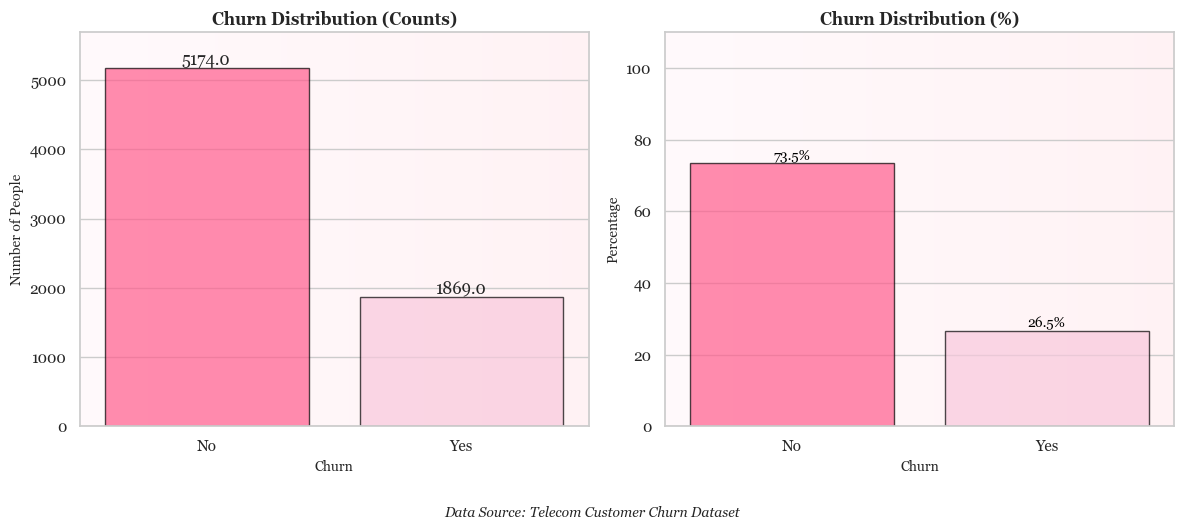

In [9]:
# Import the necessary libraries
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Set theme and font
sns.set_theme(style="whitegrid", font="Georgia")

# Soft pink palette
soft_pink_palette = ['#FF5C8D', '#F8C8DC']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1. Plot counts 
ax1 = axes[0]
sns.countplot(x='Churn', hue='Churn', data=dataset, palette=soft_pink_palette, alpha=0.7, ax=ax1, edgecolor='black', linewidth=1, saturation=1)

# Add soft gradient background for counts plot 
cmap = LinearSegmentedColormap.from_list('pink_grad', ['#FFE6F0', '#FFC0CB'])
ax1.imshow(np.linspace(0, 1, 256).reshape(1, -1), cmap=cmap, aspect='auto',
           extent=[-0.5, 1.5, 0, max(dataset['Churn'].value_counts())*1.1], alpha=0.2, zorder=0)

ax1.set_title('Churn Distribution (Counts)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Churn', fontsize=10)
ax1.set_ylabel('Number of People', fontsize=10)

# Add count labels 
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 50))

# 2. Plot percentages 
ax2 = axes[1]

# Calculate percentages
churn_pct = dataset['Churn'].value_counts(normalize=True) * 100
churn_df = churn_pct.reset_index()
churn_df.columns = ['Churn', 'Percentage']

sns.barplot(x='Churn', y='Percentage', hue='Churn', data=churn_df, palette=soft_pink_palette, alpha=0.7, ax=ax2, edgecolor='black',
            linewidth=1, saturation=1)

# Add soft gradient background for percentage plot 
ax2.imshow(np.linspace(0, 1, 256).reshape(1, -1), cmap=cmap, aspect='auto',
           extent=[-0.5, 1.5, 0, 110], alpha=0.2, zorder=0)

ax2.set_title('Churn Distribution (%)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Churn', fontsize=10)
ax2.set_ylabel('Percentage', fontsize=10)

# Add percentage labels
for i, row in churn_df.iterrows():
    ax2.text(i, row['Percentage'] + 1, f"{row['Percentage']:.1f}%", ha='center', fontsize=10, color='black')

# General footnote below both plots 
plt.figtext(0.5, -0.05, "Data Source: Telecom Customer Churn Dataset",
            ha="center", fontsize=10, style='italic')

plt.tight_layout()
plt.show()

**<u>Key Observations</u>**
- This bar chart shows the raw count of customers who churned versus those who didn’t.
- It clearly shows the "No" class (customers who did not churn) is larger than the "Yes" class. This indicates an imbalance in the target variable. 
- When viewed in percentages, about 74% of customers did not churn, while only 27% did.
- The second bar chart confirms the class imbalance more clearly and helps visualize the proportion of churn in the dataset.


**<u>Suggestions for Modelling and Evaluation Stages</u>**

Due to the class imbalance, the model may learn to predict the majority class most of the time and still get a high accuracy, while failing to learn the minority class ("Yes") which is important for knowing the rate of churn.

1. Use stratified sampling during train-test split to preserve class proportions.
 
2. Consider using resamling techniques.
    - Oversample the minority class (i.e. SMOTE or RandomOverSampler) and undersample the majority class (i.e. RandomUnderSampler).

3. Try assigning more weights to the minority class so the model pays more attention to it.

4. During evaluation, use metrics that handle the imbalance; use precision, recall, f1-score, auc-roc, and confusion matrices. Avoid only using accuracy.

5. Consider implementing ensemble methods like RandomForest or XGBoost; these perform better on imbalanced datasets.

6. Possibly use other models or algorithms that handle imbalance better (like class_weight='balanced' in logistic regression, decision trees, etc.).

## 4. Analysing the Categorical Columns

This section will observe the unique values in each categorical column and look for any unusual typos or mixed types.

### 4.1. Determining the unique values of each column

In [10]:
# Determine the unique values in each categorical column 
categorical_cols = dataset.select_dtypes(include=['object']).drop('Churn', axis=1).columns

# Get the unique values for the categorical cols
for col in categorical_cols:
    print(f"Unique values in '{col}':")
    print(dataset[col].value_counts())
    print('-' * 40)

Unique values in 'customerID':
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64
----------------------------------------
Unique values in 'gender':
gender
Male      3555
Female    3488
Name: count, dtype: int64
----------------------------------------
Unique values in 'Partner':
Partner
No     3641
Yes    3402
Name: count, dtype: int64
----------------------------------------
Unique values in 'Dependents':
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
----------------------------------------
Unique values in 'PhoneService':
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
----------------------------------------
Unique values in 'MultipleLines':
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
------------------------

### 4.2. Visualising with barplots

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_80967/3757713547.py:26: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_80967/3757713547.py:26: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_80967/3757713547.py:26: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_80967/3757713547.py:26: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_80967/3757713547.py:26: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


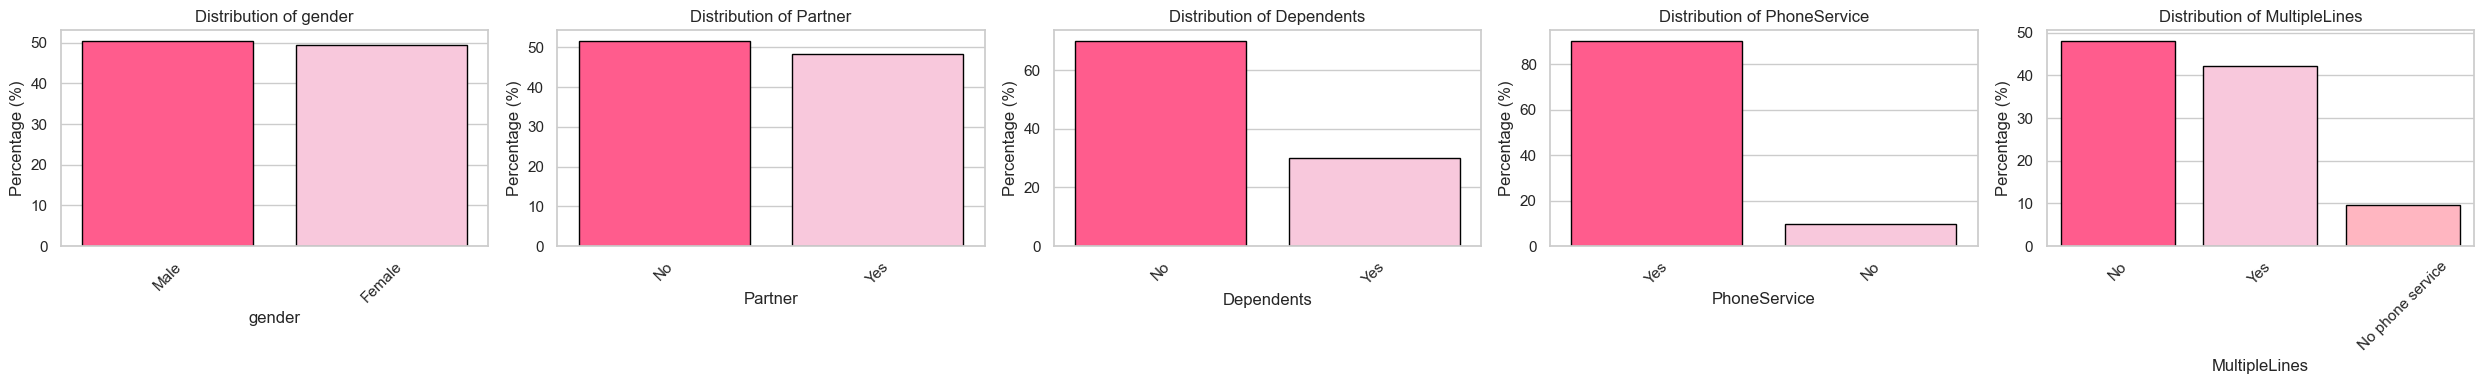

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_80967/3757713547.py:26: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_80967/3757713547.py:26: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_80967/3757713547.py:26: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_80967/3757713547.py:26: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_80967/3757713547.py:26: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq4

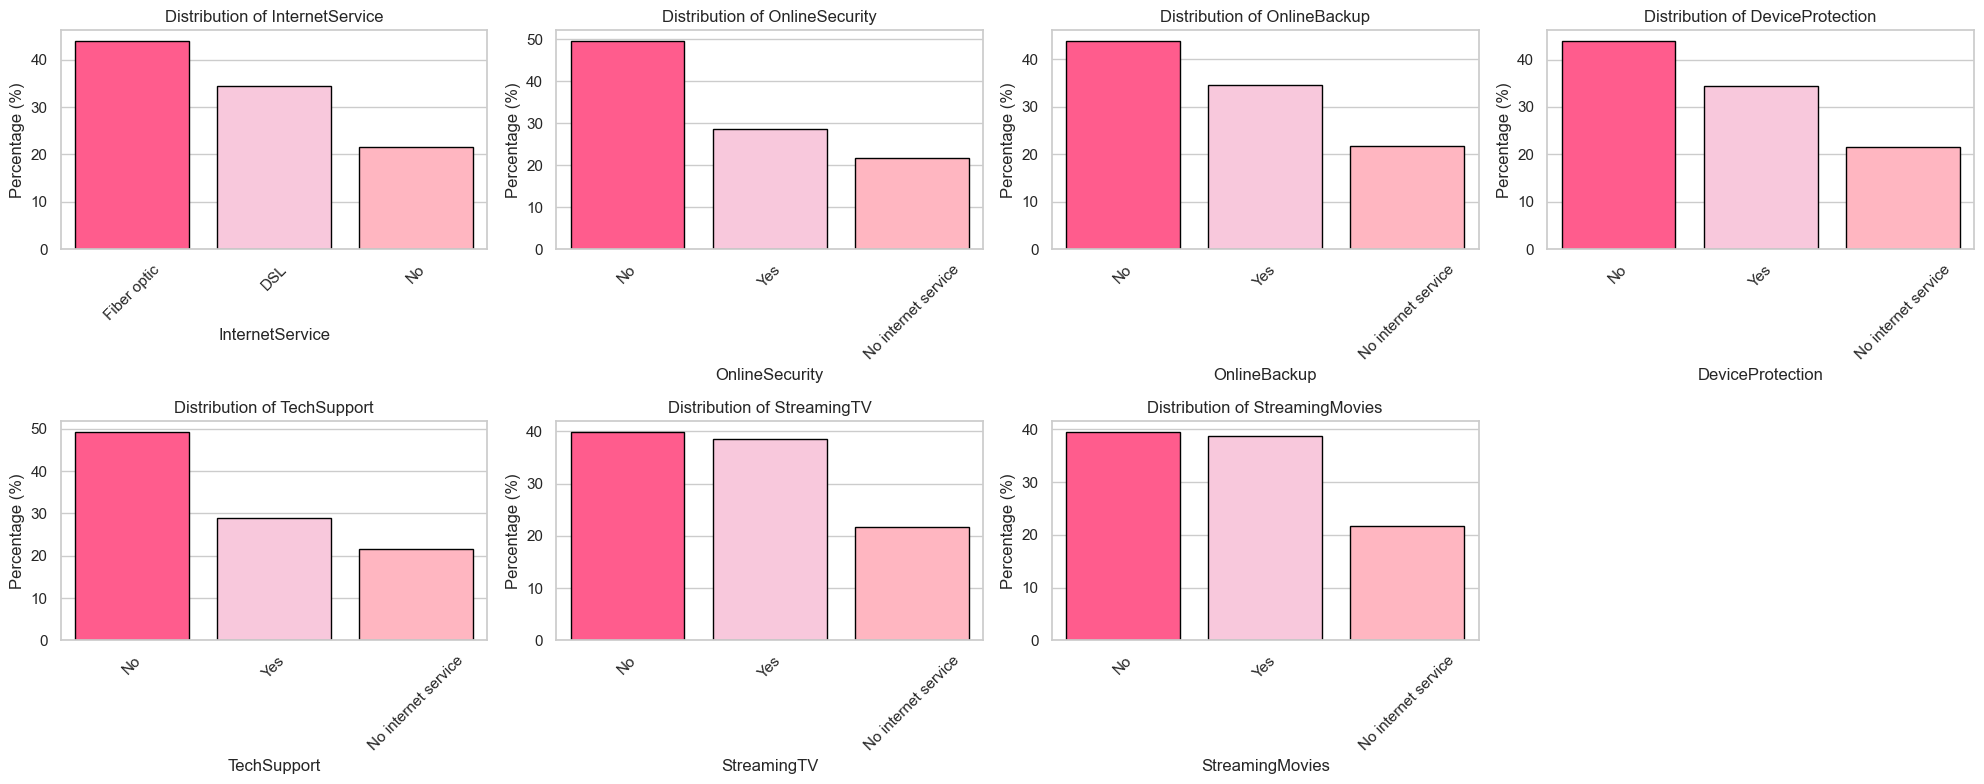

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_80967/3757713547.py:26: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_80967/3757713547.py:26: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_80967/3757713547.py:26: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


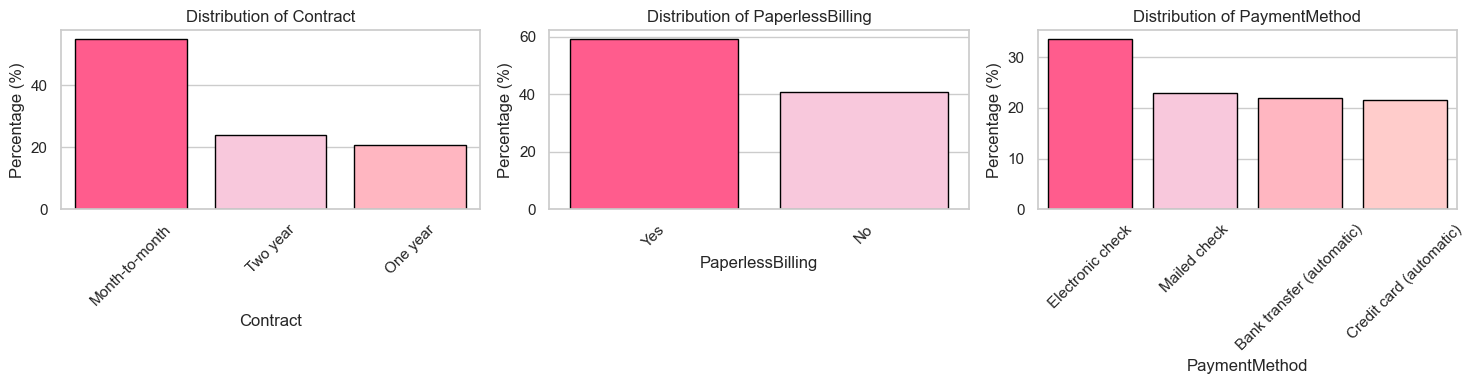

In [41]:
barplot_colours = ['#FF5C8D','#F8C8DC', '#FFB6C1', '#ffcccb', "#FFCCCB"] # '#FFB6C1', '#F8C8DC'

categorical_cols = dataset.select_dtypes(include='object') \
    .drop(dataset[['customerID', 'Churn']], axis=1).columns

# New layout: 5 in first, 7 in second, 3 in last
plots_layout = [5, 7, 3]

start_idx = 0
for plots_per_fig in plots_layout:
    cols_subset = categorical_cols[start_idx:start_idx + plots_per_fig]

    # Decide subplot grid
    if plots_per_fig == 7:
        rows, cols = 2, 4   # 2 rows x 4 cols = 8 slots (last one blank)
    else:
        rows, cols = 1, plots_per_fig

    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
    axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

    for ax, col in zip(axes, cols_subset):
        percentages = (dataset[col].value_counts(normalize=True) * 100).reset_index()
        percentages.columns = [col, "percentage"]
        
        sns.barplot(
            data=percentages,
            x=col,
            hue=col,
            y="percentage",
            palette=barplot_colours,
            legend=False,
            ax=ax,
            edgecolor='black',
            linewidth=1,
            saturation=1
        )
        ax.set_title(f"Distribution of {col}")
        ax.set_ylabel("Percentage (%)")
        ax.tick_params(axis='x', rotation=45)

    # Hide unused axes (e.g., 1 blank in the 7-plot figure)
    for ax in axes[len(cols_subset):]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()

    start_idx += plots_per_fig

**<u>General Observations</u>**

<u>1. customerID</u>
 - Each customerID is unique (all counts are 1).
 - This confirms that this column is an identifier and not useful for modeling directly. It can be dropped for modelling tasks.

<u>2. gender</u>
 - This column has a balanced distribution:
   - Male: 3555
   - Female: 3488
 - There is no significant gender imbalance.

<u>3. Partner & Dependents</u>
 
 - Partner:
   - No: 3641
   - Yes: 3402

 - Dependents:
   - No: 4933
   - Yes: 2110

 - Most customers do not have partners and even more do not have dependents. 

<u>4. PhoneService & MultipleLines</u>

 - PhoneService:
   - Yes: 6361
   - No: 682

 - MultipleLines includes “No phone service” — same number of people that do not subscribe to a phone service (682 people).
 - "No phone service" is redundant — This may be combined into a single category or encoded as 'PhoneService = No' during the data cleaning stages.

<u>5. InternetService</u>
   - Fiber optic: 3096
   - DSL: 2421
   - No: 1526
   
 - Over 20% (1526/7043) have no internet.
 - This will affect related columns like OnlineSecurity, StreamingTV, etc.

<u>6. OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies</u>
 - All have 3 categories: Yes, No, No internet service
 - Just like MultipleLines, “No internet service” is redundant (same 1526 across all).
 - These can be replaced with 'No' or handled with encoding logic.

<u>7. Contract</u>
   - Month-to-month: 3875 (55%)
   - One year: 1473
   - Two year: 1695
 - Most customers are on flexible, short-term contracts, which may relate to churn risk.

<u>8. PaperlessBilling</u>
   - Yes: 4171
   - No: 2872
 - Majority prefer paperless billing — possibly younger or tech-savvy customers.

<u>9. PaymentMethod</u>
 - 4 types — relatively balanced:
 - Electronic check leads (2365)
 - Credit card least (1522)
- Might be interesting to check if 'Electronic check' customers churn more. 

**<u>Unusual Values Found:</u>**
- MultipleLines: "No phone service" 
- Internet-related columns:	"No internet service" 
- PaymentMethod:	Long labels: 'Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'

**<u>Summary for Modelling Stage:</u>**
- customerID: Needs to be drop during modelling.
- gender: Will be left as it is as the dataset is balanced.
- Partner and Dependents: Might be useful for modelling - may need further analysis.
- PhoneService: "No phone service" value may need cleaning across related columns.
- Contract and PaymentMethod: May be useful for churn analysis - further examination of their impact is needed.
- PaperlessBilling: Binary classification, usable as-is.
- MultipleLines: "No phone service" needs to be	replaced with "No".
- Internet-related columns:	"No internet service" needs to be replaced with "No" or using flag column.
- PaymentMethod:	Long labels	need to be simplified for readability/encoding.
- All categoricals: Extra whitespace cases need to be standardized to lowercase or title case. Example: Sometimes datasets have " Yes", "yes", "YES" instead of a clean "Yes" — not immediately visible in value_counts().


### 4.3. Reducing redundancy and long labelling for improved readability

In [12]:
# Define columns and values to replace
cols_to_edit = {
    'MultipleLines': 'No phone service',
    ('OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'): 'No internet service'
}


# Replace "No phone/internet service" with "No"
for key, value in cols_to_edit.items():
    if isinstance(key, tuple):
        for col in key:
            dataset[f"{col}_Categorised"] = dataset[col].replace(value, 'No')
    else:
        dataset[f"{key}_Categorised"] = dataset[key].replace(value, 'No')


# Simplify PaymentMethod values
dataset['PaymentMethod_Categorised'] = dataset['PaymentMethod'].replace({
    'Electronic check': 'Automatic',
    'Mailed check': 'Manual',
    'Bank transfer (automatic)': 'Automatic',
    'Credit card (automatic)': 'Automatic',
})

### 4.4. Observing the unique values of each column after re-categorising 'MultipleLines', the internet-related services and 'PaymentMethod'

In [13]:
# Determine the unique values in each categorical column 
categorical_cols = dataset.select_dtypes(include=['object']).drop('Churn', axis=1).columns

# Get the unique values for the categorical cols
for col in categorical_cols:
    print(f"Unique values in '{col}':")
    print(dataset[col].value_counts())
    print('-' * 40)

Unique values in 'customerID':
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64
----------------------------------------
Unique values in 'gender':
gender
Male      3555
Female    3488
Name: count, dtype: int64
----------------------------------------
Unique values in 'Partner':
Partner
No     3641
Yes    3402
Name: count, dtype: int64
----------------------------------------
Unique values in 'Dependents':
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
----------------------------------------
Unique values in 'PhoneService':
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
----------------------------------------
Unique values in 'MultipleLines':
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
------------------------

In [14]:
# Determine the unique values in each categorical column 
adjusted_categorical_cols = dataset[['MultipleLines_Categorised', 'OnlineSecurity_Categorised', 'OnlineBackup_Categorised', 
                                     'DeviceProtection_Categorised', 'TechSupport_Categorised', 'StreamingTV_Categorised',
                                     'StreamingMovies_Categorised', 'PaymentMethod_Categorised']].columns



# Get the unique values for the categorical cols
for col in adjusted_categorical_cols:
    print(f"Unique values in '{col}':")
    print(dataset[col].value_counts())
    print('-' * 40)

Unique values in 'MultipleLines_Categorised':
MultipleLines_Categorised
No     4072
Yes    2971
Name: count, dtype: int64
----------------------------------------
Unique values in 'OnlineSecurity_Categorised':
OnlineSecurity_Categorised
No     5024
Yes    2019
Name: count, dtype: int64
----------------------------------------
Unique values in 'OnlineBackup_Categorised':
OnlineBackup_Categorised
No     4614
Yes    2429
Name: count, dtype: int64
----------------------------------------
Unique values in 'DeviceProtection_Categorised':
DeviceProtection_Categorised
No     4621
Yes    2422
Name: count, dtype: int64
----------------------------------------
Unique values in 'TechSupport_Categorised':
TechSupport_Categorised
No     4999
Yes    2044
Name: count, dtype: int64
----------------------------------------
Unique values in 'StreamingTV_Categorised':
StreamingTV_Categorised
No     4336
Yes    2707
Name: count, dtype: int64
----------------------------------------
Unique values in 'Stream

**<u>Key Observations</u>**


<u>1. MultipleLines_Categorised</u>
 - MultipleLines no longer includes “No phone service”.
 - After changing the value of "No phones service" to "No", the number of customers that do not subscribe to multiple phone service lines jumped from 48% to nearly 60% of customers. 

<u>2. OnlineSecurity_Categorised, OnlineBackup_Categorised, DeviceProtection_Categorised, TechSupport_Categorised, StreamingTV_Categorised, StreamingMovies_Categorised</u>
 - All have 2 categories now: Yes, and No
 - Most customers are not subscribed to any add on internet services. It will be valuable to see if a customer not having any added benefits on their plan coincides with strong churn turnover.

<u>3. PaymentMethod_Categorised</u>
 - Categorising the values show that over 70% of customers prefer automatic payments. The next step will be to see if this coincides with a demographic that is more or less likely to churn.

### 4.5. Visualising with barplots

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_80967/4179428215.py:16: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_80967/4179428215.py:16: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_80967/4179428215.py:16: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_80967/4179428215.py:16: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(


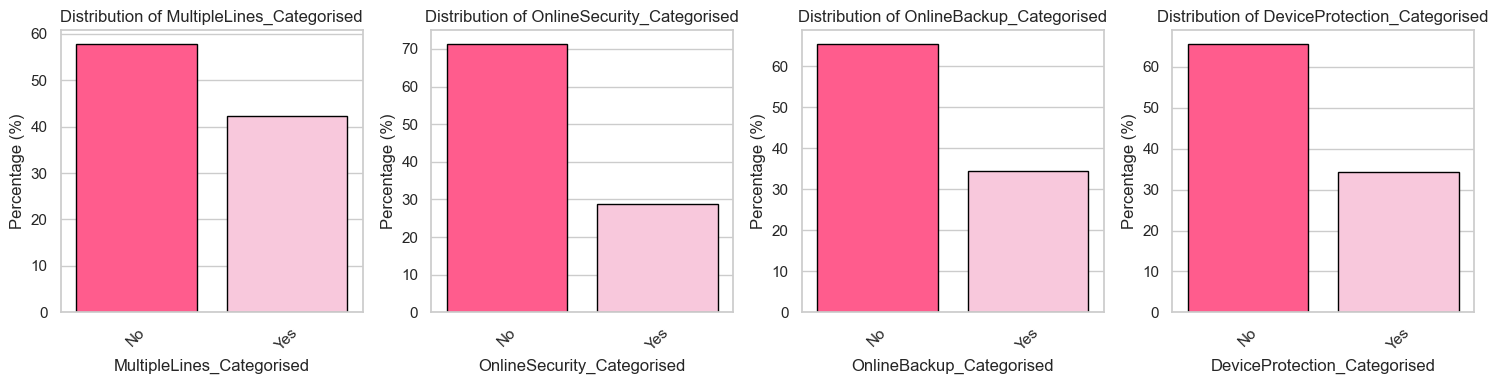

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_80967/4179428215.py:16: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_80967/4179428215.py:16: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_80967/4179428215.py:16: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_80967/4179428215.py:16: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(


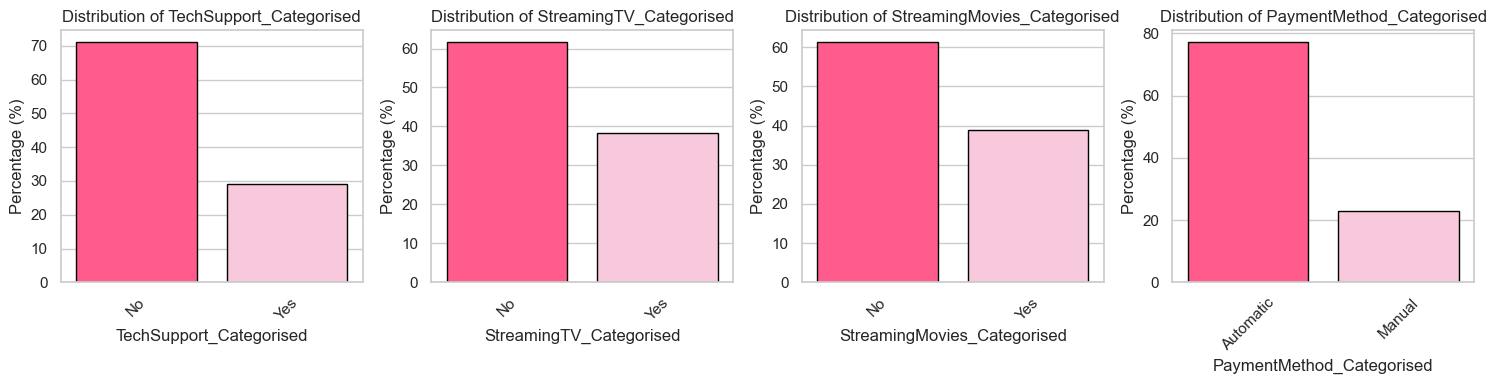

In [42]:
barplot_colours = ['#FF5C8D','#F8C8DC', '#FFB6C1', '#ffcccb', "#FFCCCB"]


plots_per_fig = 4

for i in range(0, len(adjusted_categorical_cols), plots_per_fig):
    fig, axes = plt.subplots(1, plots_per_fig, figsize=(15, 4))
    cols_subset = adjusted_categorical_cols[i:i+plots_per_fig]
    
    for ax, col in zip(axes, cols_subset):
        # Compute percentages
        percentages = (dataset[col].value_counts(normalize=True) * 100).reset_index()
        percentages.columns = [col, "percentage"]
        
        # Barplot with percentages
        sns.barplot(
            data=percentages,
            x=col,
            hue=col,
            y="percentage",
            palette=barplot_colours,
            legend=False,
            ax=ax,
            edgecolor='black',
            linewidth=1,
            saturation=1
        )
        
        ax.set_title(f"Distribution of {col}")
        ax.set_ylabel("Percentage (%)")
        ax.tick_params(axis='x', rotation=45)
    
    # Hide unused axes
    for ax in axes[len(cols_subset):]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

## 5. Analysing The Numerical Columns

This section will study the numerical features using statistical methods and observe if the features have any unusual categories. 

### 5.1. Analysing the descriptive statistics of the numerics to see what they tell us about their shapes, centers, and the spreads of their data 

In [16]:
# Create a new column 'EstimatedTotalCharges': an estimate of what the customer has paid in total if there are no missing values or inconsistencies
dataset['EstimatedTotalCharges'] = dataset['MonthlyCharges'] * dataset['tenure']

In [17]:
# Determine the unique values in each categorical column 
numerical_cols = dataset.select_dtypes(include=['number'])

# Get the unique values for the categorical cols
for col in numerical_cols:
    print(f"\nStats for {col}:")
    print("Min:", dataset[col].min())
    print("Max:", dataset[col].max())
    print("Mean:", dataset[col].mean().round(2))
    print("Median:", dataset[col].median().round(2))
    print("Std:", dataset[col].std().round(2))


Stats for SeniorCitizen:
Min: 0
Max: 1
Mean: 0.16
Median: 0.0
Std: 0.37

Stats for tenure:
Min: 0
Max: 72
Mean: 32.37
Median: 29.0
Std: 24.56

Stats for MonthlyCharges:
Min: 18.25
Max: 118.75
Mean: 64.76
Median: 70.35
Std: 30.09

Stats for TotalCharges:
Min: 18.8
Max: 8684.8
Mean: 2283.3
Median: 1397.48
Std: 2266.77

Stats for EstimatedTotalCharges:
Min: 0.0
Max: 8550.0
Mean: 2279.58
Median: 1393.6
Std: 2264.73


**<u>General Observations</u>**

<u>1. SeniorCitizen</u>
 - Min: 0, Max: 1 —> This is a binary variable (0 = not senior, 1 = senior).
 - Mean: ~0.16  —> Only ~16% of customers are senior citizens.
 - Median: 0  —> More than half of the customers are not seniors.
 - Std (Standard Deviation): ~0.37 —> is low (expected in binary data with skew).
- Interpretation: Majority of the customers are not senior citizens. 

<u>2. Tenure (Months with Company)</u>
 - Min: 0 (new customers), Max: 72 (6 years).
 - Mean: ~32 months, Median: ~29 months —> Distribution is lightly right skewed (more newer customers)
 - Std: ~24.56 —> High variability in customer loyalty duration.
- Interpretation:Tenure values are spread out and vary widely across customers.

<u>3. MonthlyCharges</u>
 - Min: $18.25, Max: $118.75 —> Wide range of monthly charges
 - Mean: $64.76, Median: $70.35  —> Distribution is slightly left-skewed (a few low-paying customers drag the average down)
 - Std: $30.09  —> Large spread in what customers are charged monthly —> High variability
- Interpretation: There are customers with low, mid, and high monthly charges —> Monthly charges are fairly spread out, with a slight tendency to have more higher values.

<u>4. TotalCharges</u>
 - Min: $18.8, Max: $8684.8 —> Cumulative cost depends on tenure: TotalCharges = MonthlyCharges × Tenure (roughly)
 - Mean: $2283.30, Median: $1397.48 —> Distribution is strongly right-skewed 
 - Std: $2266.77 —> Very wide spread, some customers are long-term and high-paying
- Interpretation: Strongly right-skewed (mean is much higher than median) —> a few high-value customers increase the average.


<u>5. EstimatedTotalCharges</u>
 - Min: $0.0, Max: $8550.0 —> Cumulative cost depends on tenure, the same as TotalCharges. EstimatedTotalCharges = MonthlyCharges × Tenure (exactly)
 - Mean: $2279.58, Median: $1393.6 —> Just like TotalCharges, the distribution is strongly right-skewed 
 - Std: $2264.73 —> Also, very widey spread, some customers are long-term and high-paying
- Interpretation: Strongly right-skewed (mean is much higher than median) —> a few high-value customers increase the average. The plot should be almost similar to that of TotalCharges as the values are almost similar. 
- The major difference between them is their minimum values. 

**<u>Suggestions for Later EDA</u>**
1. Explore if senior citizens are more or less likely to churn.
2. Check if shorter tenures correlate with higher churn.
3. Explore churn patterns by pricing tiers.
4. Check whether high-value or long-tenure customers are loyal.

**<u>Suggestions for Later Modelling Stage</u>**
1. Pay close attention to 'TotalCharges' and 'EstimatedTotalCharges' due to how closely related they are as the issue of multicollinearity could arise


### 5.2. Visualising the numerical data

#### 5.2.1. Visualising the distribution (frequency) of the numerical values using a histogram

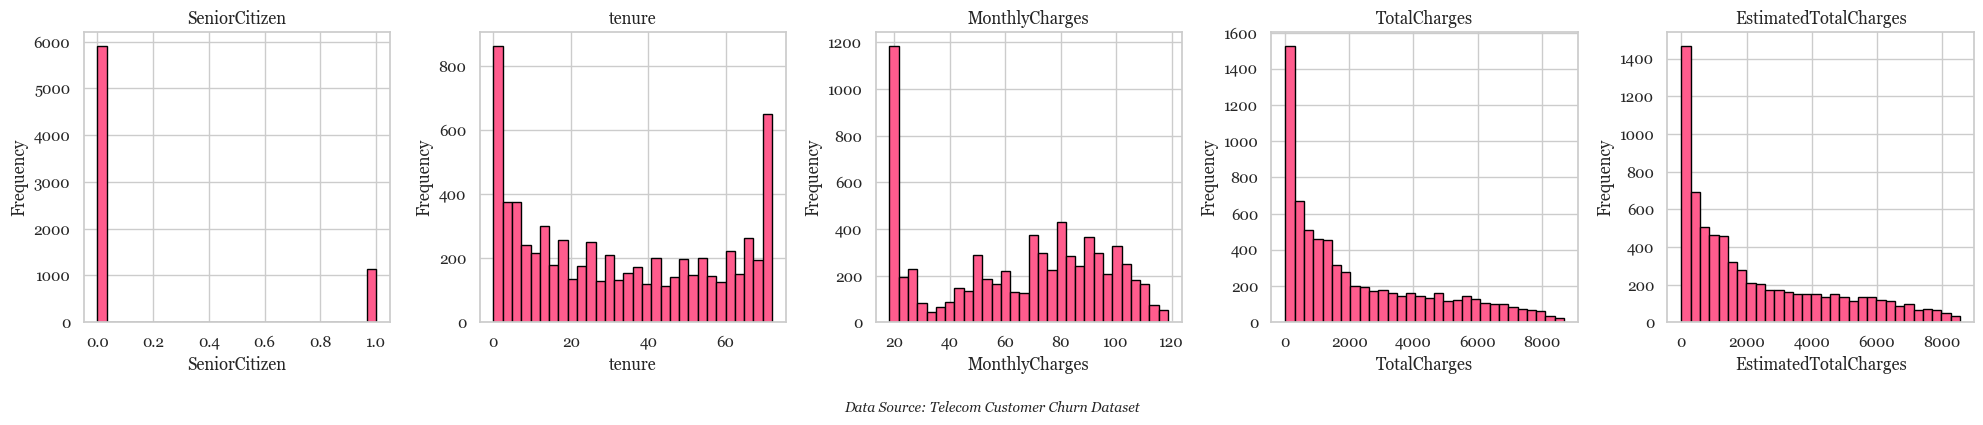

In [18]:
# Select the names of the numerical columns
num_cols_names = dataset.select_dtypes(include='number').columns

# Create the plot
plt.figure(figsize=(20, 4))

# Plot details, titles, labels 
for i, col in enumerate(num_cols_names):
    plt.subplot(1, len(num_cols_names), i + 1)
    plt.hist(dataset[col], bins=30, color='#FF5C8D', edgecolor='black')
    plt.title(f'{col}', font='Georgia')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.figtext(0.5, -0.05, "Data Source: Telecom Customer Churn Dataset",
            ha="center", fontsize=10, style='italic')

# Give it a clean finish
plt.tight_layout()
plt.show()

**<u>General Observations</u>**

<u>1. SeniorCitizen Plot</u>
- The histogram confirms most customers are not senior citizens.
- Very imbalanced feature.

<u>2. tenure Plot</u>
- Distribution is U-shaped.
- High frequency of customers at the start and end of the tenure range.
- Suggests short-term and long-term customers are more common than mid-term.

<u>3. MonthlyCharges Plot</u>
- Shows a multimodal or skewed distribution.
- One big spike at the low end (likely basic plans), others distributed broadly.
- Suggests customers are either on minimal or standard plans.

<u>4. TotalCharges and EstimatedTotalCharges Plots (Before Converting Variables To Type 'Float')</u>
- Histograms have an unusual shape; they're truncated or shaded oddly (gray at the top). (this was prior to dropping the missing values and changing the data type)
- Bottom axis is cluttered -> Might be a formatting issue or a datatype problem in the data (e.g. string mixed with numbers).
- Frequency is high at lower TotalCharges and EstimatedTotalCharges,and then tapers off gradually.

<u>5. TotalCharges and EstimatedTotalCharges Plots (After Converting Variables To Type 'Float')</u>
- Distributions are skewed strongly to the right.
- While many customers make relatively small payments, there is a significant subset of long-term customers who accumulate very high charges. 



**<u>Consistency Between Stats and Plots</u>**
- SeniorCitizen: Consistent – both stats and plot show imbalance (most are non-seniors).
- Tenure: Consistent – stats show a wide spread, plot confirms U-shape.
- MonthlyCharges: Mostly consistent – stats indicate high variability, and plot shows wide spread and skew.
- TotalCharges (Before Correcting Data Types): Had some inconsistencies: 
    - The appearance of the plot is off (cluttered X-axis, gray area).
    - Stats implied right skew with high max/mean, but the plot didn’t clearly represent that.
    - This hints at a possible data quality issue (e.g., TotalCharges may have string entries or nulls).
- TotalCharges and EstimatedTotalCharges (After Correcting Data Types): Plots are now consistent.
    - Plots are consistent with the stats.
    - They show wide spreads with a strong right skew.


**<u>Problems to Address During the Modelling Stage</u>**
1. Problem 1: Class Imbalance in SeniorCitizen
 - Issue: Binary feature heavily skewed (majority are non-seniors).
 - Fix:
    - Try using stratified sampling during train-test split.
    - Consider using SMOTE or class weights if this imbalance impacts churn prediction.

2. Problem 2: TotalCharges Axis/Distribution Issue
 - Issue: Plotting error and possibly invalid data entries.
 - Fix:
    - Remember to convert TotalCharges to a numeric column using pd.to_numeric(errors='coerce').
    - Remember to handle NaNs (remove or impute based on tenure × MonthlyCharges).
    - Verify datatype: df['TotalCharges'].dtype.

3. Problem 3: High Skew in Features (e.g. TotalCharges and EstimatedTotalChargesPlot)
 - Issue: Right skew in both features. Could affect models sensitive to distribution (e.g., linear regression).
 - Fix:
    - Try applying log transformation or box-cox transformation to normalize.
    - Implement robust scaling (not min-max) due to outliers.

4. Problem 4: Multimodal Distributions
 - Issue: MonthlyCharges showing multiple peaks.
 - Fix:
    - May indicate subgroups (e.g., multiple service types) -> try creating clusters or use domain knowledge to bin into categories (e.g., low/mid/high plan).

5. Problem 5: Check multicollinearity between TotalCharges and EstimatedCharges
 - Consider dropping one of them to avoid breaking the model. 
 - Do this after checking feature importance.

6. **Not an urgent problem: Feature engineering**
- For improved modelling, try binning tenure into categories e.g. (low/med/high)

#### 5.2.2. Visualising the distributions across categories and detecting outliers using boxplots

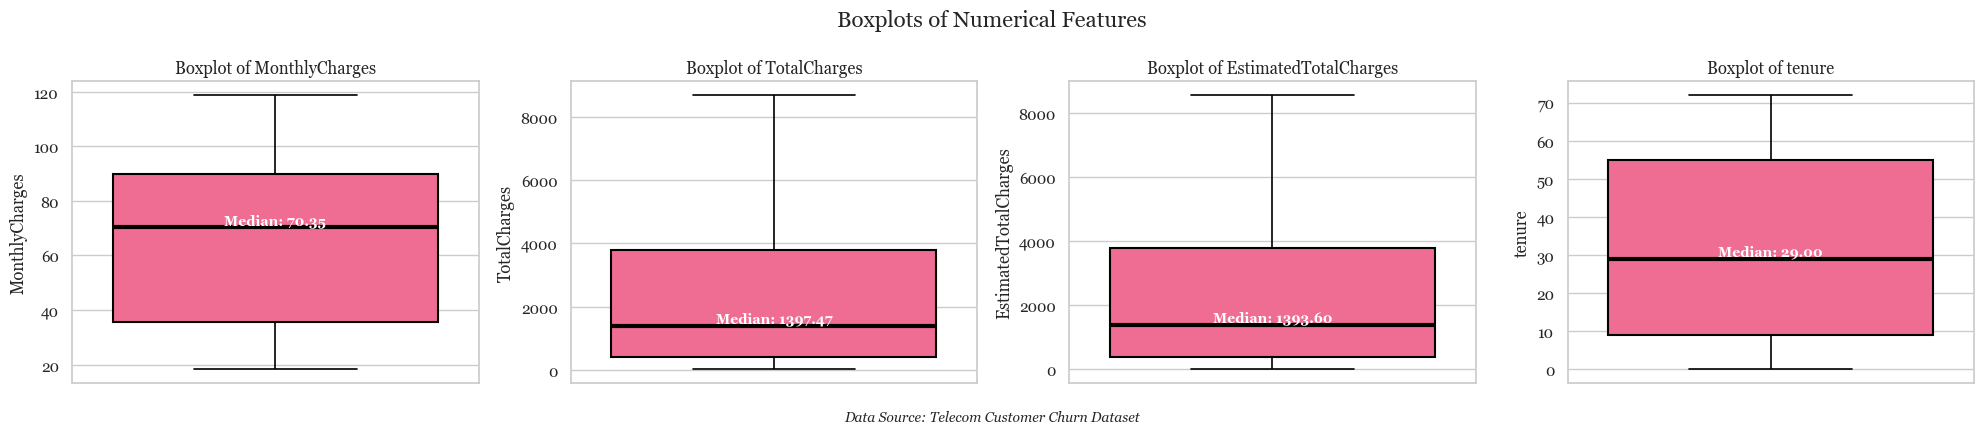

In [19]:
# Select the numerical columns for analysis 
num_cols = ['MonthlyCharges', 'TotalCharges', 'EstimatedTotalCharges', 'tenure']

# Create a new DataFrame containing only these columns - (keeping missing values for exploratory data analysis) 
df = dataset[num_cols]  

# Create a figure with 1 row and 4 subplots (one for each numerical column) 
# Create a figure with 1 row and 4 subplots (one for each numerical column) 
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Loop through each numerical column and its corresponding subplot 
for i, col in enumerate(num_cols):
    #  Create a boxplot with saturation and black edges
    sns.boxplot(
        y=df[col],
        ax=axes[i],
        color='#FF5C8D',
        linewidth=1.5,       # edge line width
        saturation=0.8,      # saturation of fill
        boxprops=dict(edgecolor="black"),
        whiskerprops=dict(color="black", linewidth=1.2),
        capprops=dict(color="black", linewidth=1.2),
        medianprops=dict(color="black", linewidth=3)  # highlight median
    )
    
    # Add a title and axis labels 
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(f'{col}')

    # Calculate the median of the column 
    median_val = df[col].median()
    
    # Annotate median on the plot
    axes[i].text(0, median_val, f'Median: {median_val:.2f}', 
                 horizontalalignment='center', 
                 verticalalignment='bottom',
                 fontsize=10, color='white', fontweight='bold')

# Add a main title and footnote for all boxplots 
plt.suptitle('Boxplots of Numerical Features', fontsize=16)

plt.figtext(0.5, -0.05, "Data Source: Telecom Customer Churn Dataset",
            ha="center", fontsize=10, style='italic')

# Adjust layout to prevent overlapping text/plots 
plt.tight_layout()

# Display the plots
plt.show()

**<u>General Observations</u>**

<u>1. MonthlyCharges</u>

- The boxplot shows that most customers are charged between $35 and $90 per month.
- The median value is $70.35, indicating many customers are in mid-range pricing plans.
- Distribution is fairly symmetric, with few or no visible outliers.
- Implication: Feature is well-behaved and ready for modeling with minimal transformation.

<u>2. TotalCharges</u>

- This feature has a wide spread, ranging from near $0 to over $8600.
- The median is $1397.47, but the upper whisker extends far, indicating a strong right-skew.
- Likely contains outliers or customers with long tenure and high monthly charges.
- Implication: This feature is skewed and may require log transformation to reduce its influence.

<u>3. Tenure</u>

- The median tenure is 29 months, with values ranging from 0 to 72 months (6 years).
- The distribution is somewhat positively (right) skewed, showing more customers have shorter tenure.
- No significant outliers are present.
- Implication: Useful feature; may benefit from binning or scaling.

<u>4. EstimatedTotalCharges</u>

- Feature has a wide spread. Values range $0 to over $8500.
- Median is $1393.60.
- Upper whisker extends far, indicating a strong right-skew.
- May contain outliers or customers with long tenure and high monthly charges just like TotalCharges.
- Implication: Feature may need to be log-transformed due to high skew to reduce its influence.

**<u>Underlying Issues Detected</u>**

- TotalCharges and EstimatedTotalCharges have Right-skewed distributions. This could affect model performance; extreme values dominate.
- TotalCharges, MonthlyCharges, tenure, and EstimatedTotalCharges have different scales. This can mislead distance-based models (e.g. KNN, SVM).
- TotalCharges and EstimatedTotalCharges might have possible outliers. May distort mean and affect regression/classification.
- 'Zero tenure' found in tenure. Suggests new customers – these values need to be investigated to determine if they are valid or due to a data entry error


**<u>Suggestions for Modelling Stage</u>**

1. Data Cleaning
    - Investigate and handle zero tenure or zero total charges cases.
    - Verify if TotalCharges = 0 for customers with tenure = 0 — this could be a data error.

2. Feature Scaling
    - Apply MinMaxScaler or StandardScaler on MonthlyCharges, TotalCharges, tenure, and EstimatedTotalCharges to ensure equal treatment in models.

3. Transformation
    - Apply log transformation to TotalCharges and EstimatedTotalCharges to reduce skew:

4. Binning (Optional)
    - Consider and look into 'binning' for tenure to divide it into categories (e.g., ‘New’, ‘Medium-term’, ‘Loyal’) to explore patterns in churn.

5. Outlier Handling
    - Consider capping extreme values of TotalCharges and EstimatedTotalCharges or using RobustScaler if outliers are meaningful.

## 6. Checking for and Handling Missing Data

This section will investigate if there are any columns with missing row entries.

### 6.1. Checking if any columns have any missing row entries

In [20]:
# Check for missing values
print(dataset.isnull().sum())

customerID                       0
gender                           0
SeniorCitizen                    0
Partner                          0
Dependents                       0
tenure                           0
PhoneService                     0
MultipleLines                    0
InternetService                  0
OnlineSecurity                   0
OnlineBackup                     0
DeviceProtection                 0
TechSupport                      0
StreamingTV                      0
StreamingMovies                  0
Contract                         0
PaperlessBilling                 0
PaymentMethod                    0
MonthlyCharges                   0
TotalCharges                    11
Churn                            0
MultipleLines_Categorised        0
OnlineSecurity_Categorised       0
OnlineBackup_Categorised         0
DeviceProtection_Categorised     0
TechSupport_Categorised          0
StreamingTV_Categorised          0
StreamingMovies_Categorised      0
PaymentMethod_Catego

**<u>General Observations</u>**
- All columns except TotalCharges have 0 missing values, meaning every record has valid data entry in those columns.
- The column TotalCharges has 11 missing values (null or NaN).
- Since TotalCharges is a numerical column representing the total amount charged to customers, these missing values may correspond to customers who are new or have incomplete billing data.
- Missing values need to be addressed before using TotalCharges for modeling or analysis to avoid errors or bias.

#### 6.1.1  Exploring the rows with missing 'TotalCharges' to understand their context better

In [21]:
dataset[dataset['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Churn,MultipleLines_Categorised,OnlineSecurity_Categorised,OnlineBackup_Categorised,DeviceProtection_Categorised,TechSupport_Categorised,StreamingTV_Categorised,StreamingMovies_Categorised,PaymentMethod_Categorised,EstimatedTotalCharges
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,No,No,Yes,No,Yes,Yes,Yes,No,Automatic,0.0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No,No,No,No,No,No,No,No,Manual,0.0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Manual,0.0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No,Yes,No,No,No,No,No,No,Manual,0.0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,No,No,Yes,Yes,Yes,Yes,Yes,No,Automatic,0.0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No,No,No,No,No,No,No,No,Manual,0.0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No,Yes,No,No,No,No,No,No,Manual,0.0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No,No,No,No,No,No,No,No,Manual,0.0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No,No,No,No,No,No,No,No,Manual,0.0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Yes,Yes,Yes,No,Manual,0.0


**<u>Key Observations</u>**
- The 11 rows in 'TotalCharges' have missing or undefined values in the dataset.
- In the TotalCharges column, 'NaN' means that for those 11 rows, the total amount charged to the customer is not recorded or unavailable.
- This often happens if the customer is new and hasn’t been billed yet, or if there was an issue in recording their billing data.
- Since TotalCharges roughly depends on how long the customer has been active and their monthly charges, these missing values might correspond to customers with zero or very low tenure (meaning very recently joined customers).

#### 6.1.2. Verifying if those 11 customers have low tenure

In [22]:
# Display the following columns where 'TotalCharges is NaN 
dataset[dataset['TotalCharges'].isnull()][['tenure', 'MonthlyCharges', 'TotalCharges', 'EstimatedTotalCharges']]

,tenure,MonthlyCharges,TotalCharges,EstimatedTotalCharges
488,0,52.55,NaN,0.0
753,0,20.25,NaN,0.0
936,0,80.85,NaN,0.0
1082,0,25.75,NaN,0.0
1340,0,56.05,NaN,0.0
3331,0,19.85,NaN,0.0
3826,0,25.35,NaN,0.0
4380,0,20.00,NaN,0.0
5218,0,19.70,NaN,0.0
6670,0,73.35,NaN,0.0


**<u>Key Observations</u>**

- All customers with missing TotalCharges have a tenure of 0, meaning they are brand new customers who haven't stayed for any full billing cycle yet.
- Since TotalCharges represents the total amount billed so far, it makes sense that for these new customers, the total charge is not yet available — hence, it is recorded as NaN.
- Their MonthlyCharges values are present because this is the expected monthly cost, but no billing has occurred yet due to zero tenure.


**<u>Suggestions for modelling - Handling Missing Data in TotalCharges</u>**
1. Consider dropping the rows with missing TotalCharges.
Reasons: 
 - There are only 11 missing rows out of thousands, so dropping them will likely not affect the analysis significantly.
 - These rows correspond to customers with tenure = 0, meaning they haven’t really started their subscription or billing cycle yet.
 - Keeping them might skew results if analysis focuses on total charges or tenure-related patterns.

or

2. Imputing (filling) the missing values.
- Although this might be less ideal because TotalCharges roughly depends on MonthlyCharges and tenure, and tenure is zero here, the expected TotalCharges should logically be zero.
- Consider imputing zero, but in the long run, it might be simpler and cleaner just to drop these few rows.

#### 6.1.3. Checking how many rows in the 'TotalCharges' match up with the true product in 'EstimatedTotalCharges'

In [23]:
dataset[dataset['TotalCharges'] == dataset['EstimatedTotalCharges']][['tenure', 'MonthlyCharges', 'TotalCharges', 'EstimatedTotalCharges']]


,tenure,MonthlyCharges,TotalCharges,EstimatedTotalCharges
0,1,29.85,29.85,29.85
20,1,39.65,39.65,39.65
22,1,20.15,20.15,20.15
27,1,30.20,30.20,30.20
33,1,20.20,20.20,20.20
...,...,...,...,...
6979,1,24.20,24.20,24.20
7010,1,74.45,74.45,74.45
7016,1,49.95,49.95,49.95
7018,1,70.65,70.65,70.65


**<u>Key Observations</u>**

- Only 614 rows show consistency across both columns. Meaning that over 90% of customers have billing discrepancies recorded. 

- Reasons for this may include: Partial months of service, extra charges, fees, or credits not captured in MonthlyCharges * Tenure

- This could highlight customers with unusual billing behavior, which might relate to churn.

**<u>Suggestions for Modelling</u>**


- Create columns to highlight billing issues, discounts, or partial months

## 7. Looking for Relationships

The section will give some insight into which features are correlated and identify if certain patterns occur with churn.

### 7.1. Determining which features might be relevant for modelling using grouped bar charts.

Objectives:
- Determine if certain categories have more churners?
- Find out if there are proportions different across groups?
- Look for clear differences or unexpected similarities.

#### 7.1.1.  Looking for correlation or association with churn

In [24]:
# Loop through all catgorical cols to get the percentage churn distribution by each column 
for col in categorical_cols[1:]:
    print(f"Churn distribution by {col}:")
    ct = pd.crosstab(dataset[col], dataset['Churn'], normalize='index') * 100
    print(ct.round(2))
    print("-" * 40)

Churn distribution by gender:
Churn      No    Yes
gender              
Female  73.08  26.92
Male    73.84  26.16
----------------------------------------
Churn distribution by Partner:
Churn       No    Yes
Partner              
No       67.04  32.96
Yes      80.34  19.66
----------------------------------------
Churn distribution by Dependents:
Churn          No    Yes
Dependents              
No          68.72  31.28
Yes         84.55  15.45
----------------------------------------
Churn distribution by PhoneService:
Churn            No    Yes
PhoneService              
No            75.07  24.93
Yes           73.29  26.71
----------------------------------------
Churn distribution by MultipleLines:
Churn                No    Yes
MultipleLines                 
No                74.96  25.04
No phone service  75.07  24.93
Yes               71.39  28.61
----------------------------------------
Churn distribution by InternetService:
Churn               No    Yes
InternetService        

**<u>Churn Observations by Categorical Feature</u>**

1. <u>gender</u>
      - The churn rates for Female (26.92%) and Male (26.16%) are almost the same.
      - This suggests gender may not have a strong influence on churn.

2. <u>Partner</u>
      - Customers without partners have a higher churn rate (32.96%) compared to those with partners (19.66%).
      - This implies that having a partner may reduce the likelihood of churn, possibly due to shared decision-making or stability.

3. <u>Dependents</u>
      - Customers without dependents have a higher churn rate (31.28%) than those with dependents (15.45%).
      - This suggests customers with dependents may be more stable or committed.

4. <u>PhoneService</u>
      - The churn rates for customers with and without phone service are quite similar (24.93% vs 26.71%).
      - Phone service may not significantly impact churn.

5. <u>MultipleLines</u>
      - Customers with multiple lines have a slightly higher churn rate (28.61%) than those without (25.04%).
      - This feature might have some relationship with churn but not a strong one.

6. <u>InternetService</u>
      - Customers with Fiber optic service have a high churn rate (41.89%), compared to DSL (18.96%) and No internet (7.40%).
      - This indicates that InternetService type affects churn significantly — fiber users are more likely to churn.

7. <u>OnlineSecurity</u>
      - Customers without online security have a high churn rate (41.77%) compared to those with the service (14.61%).
      - Online security may be a strong retention factor.

8. <u>OnlineBackup</u>
      - Customers without online backup have a churn rate of 39.93%, versus 21.53% for those with it.
      - This suggests backup services may help reduce churn.

9.  <u>DeviceProtection</u>
      - Churn is higher for customers without device protection (39.13%) compared to those with it (22.50%).
      - Device protection appears to have a negative correlation with churn. There is a stong association.

10. <u>TechSupport</u>
      - Customers without tech support have a churn rate of 41.64%, compared to 15.17% for those without it.
      - Tech support may significantly reduce churn.

11. <u>StreamingTV</u>
      - Customers not using StreamingTV have a churn rate of 33.52%, slightly higher than those who do (30.07%).
      - StreamingTV might contribute to customer engagement, but the impact is moderate.

12. <u>StreamingMovies</u>
      - Similar to StreamingTV, churn is slightly higher for non-users (33.68%) vs users (29.94%).
      - StreamingMovies has a mild effect on churn.

13. <u>Contract</u>
      - Month-to-month contracts have a much higher churn rate (42.71%) compared to one year (11.27%) and two year (2.83%).
      - This suggests contract type strongly relates to churn — month-to-month customers are more likely to leave.

14. <u>PaperlessBilling</u>
      - Customers with paperless billing churn more (33.57%) than those without it (16.33%).
      - Paperless billing may correlate with a demographic that is more prone to churn.

15. <u>PaymentMethod</u>
      - Churn is highest among Electronic Check users (45.29%) and lowest for automatic payment users like Credit Card (15.24%).
      - Payment method choice is a strong churn indicator — automatic payments may help retain customers.

16. <u>MultipleLines_Categorised</u>
      - After re-categorising, customers with multiple lines still have a slightly higher churn rate (28.61%) than those without (25.04%).
      - Even after changing "No service phone" to "No", this feature still does not seem to have a strong effect on churn.

17. <u>OnlineSecurity_Categorised and TechSupport_Categorised</u>
      - After re-categorisation, the relationship between these two features with churn stayed the same. Customers without online security and tech support still showed higher churn rates.

18. <u>StreamingTV_Categorised and StreamingMovies_Categorised</u>
      - Relationship with churn stayed relatively the same after grouping "No internet service" with "No". 
      - This indicates that even after the feature categories have been modified, these two features still do not influence churn heavily.

18. <u>OnlineBackup_Categorised, DeviceProtection_Categorised, PaymentMethod_Categorised</u>
      - Churn differences between the these features and their original counterparts show that after re-categorisation, the differences between their categories and how they relate to churn became less pronounced. 
      - In the original categories, not having online backup and device protection services were very strong factors that influenced churn, as well as using electronic checks as a payment method.
      - However, these signals have been diluted and the influence they have on churn have become less evident.
      - Although the categories for these three features may have been simplified it came at the cost of nuance.

**<u>Suggestions for Modelling and Evaluation Stages</u>**

1. <u>gender</u>
    - Since churn rates for Male (26.16%) and Female (26.92%) are very similar, gender may not be a strong predictor.
    - May still include it initially, but will need to watch for low feature importance.

2. <u>Partner & Dependents</u>
    - Both show clear differences in churn rates (e.g., Partner = No -> 32.96% churn vs Yes -> 19.66%).
    - May capture customer stability or family context — worth including in the model.

3. <u>Contract Type</u>
    - Very strong indicator:
        - Month-to-month -> 42.71% churn
        - One-year -> 11.27%
        - Two-year -> 2.83%
    - Important categorical feature — should definitely be included.

4. <u>InternetService & Related Features</u>
    - InternetService type shows strong churn differences:
        - Fiber optic -> 41.89%
        - DSL -> 18.96%
        - No internet -> 7.40%
    - Sub-features (e.g., OnlineSecurity, OnlineBackup, TechSupport) also show strong patterns.
    - Note: Be cautious of multicollinearity — use one-hot encoding and later test feature importance or drop highly redundant ones.

5. <u>DeviceProtection</u>
    - Strong negative association with churn:
        - No protection -> 39.13% churn
        - Yes -> 22.50%
    - Indicates customers with protection are less likely to leave.
    - Worth including as a predictor.

6. <u>PaperlessBilling & PaymentMethod</u>
    - Electronic check users have highest churn (45.29%) — may reflect less committed customers.
    - PaperlessBilling = Yes also has higher churn (33.57%) vs No (16.33%) — useful categorical indicators.
    - Include both features — may carry behavioral signals.

7. <u>Multicollinearity Check</u>
    - Several services are nested within InternetService — it might be worth considering checking correlations or using techniques like PCA, VIF, or feature importance after training to reduce redundancy.
    - Use .feature_importances_ (tree models) or coefficients (logistic regression) to see which features actually help most.
    - Drop low-importance features if they don’t improve performance.

8. <u>Categorised Features</u>
    - MultipleLines_Categorised, OnlineSecurity_Categorised, TechSupport_Categorised, StreamingTV_Categorised, and StreamingMovies_Categorised showed to have similar effects on customer churn as their uncategorised counterparts, however, the effects are less evident.
        - Test both types of features and see how well the model performs.
    - While OnlineBackup (No), DeviceProtection(No), and PaymentMethod (Electronic check) provided insightful signals on what drives churn, these signals become even less pronounced when grouped.
        - Try testing the models on both types of features to see which ones allow the model to identify churn more effectively.

#### 7.1.2. Visualising counts/proportions between categorical groups using bar charts

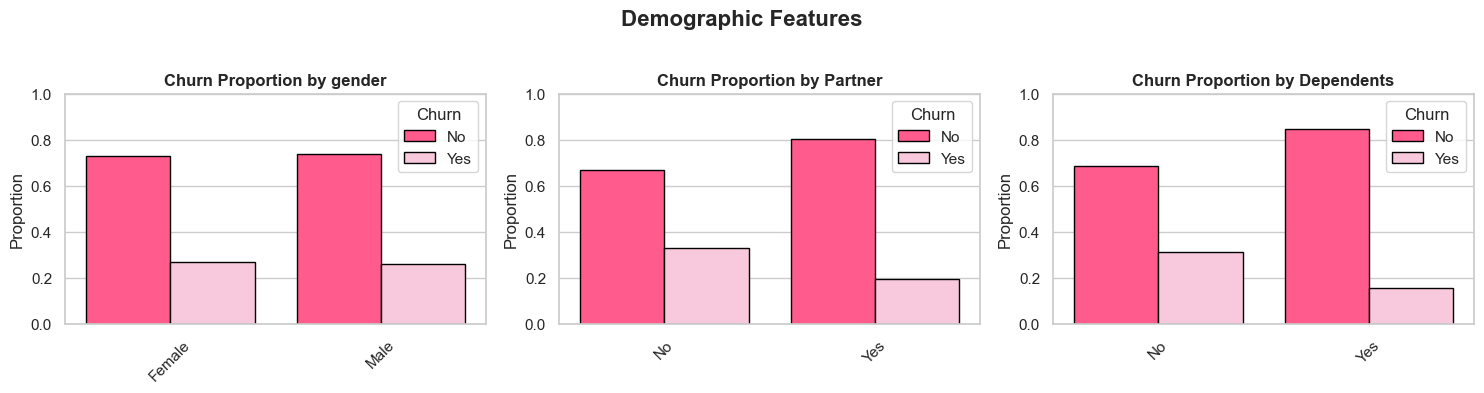

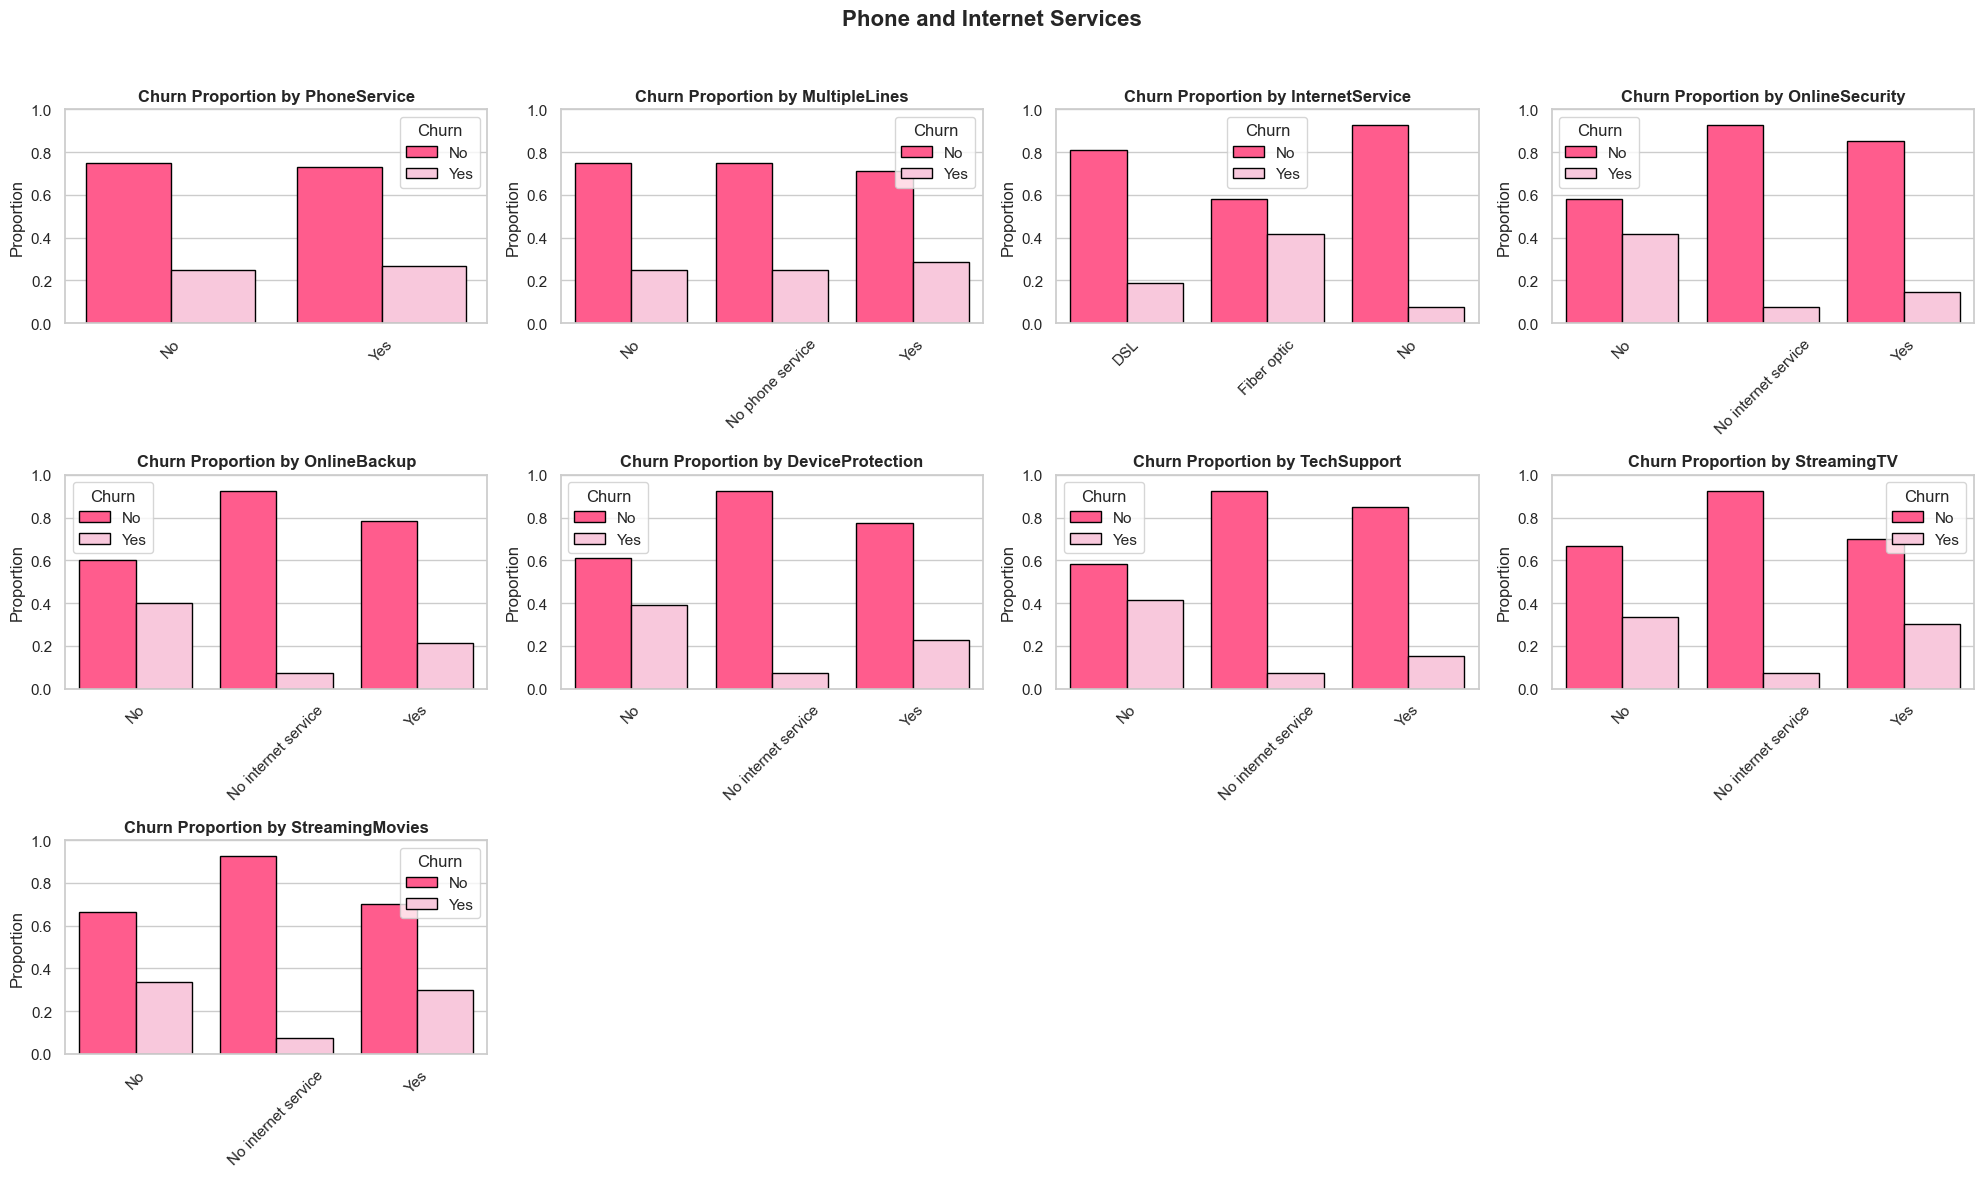

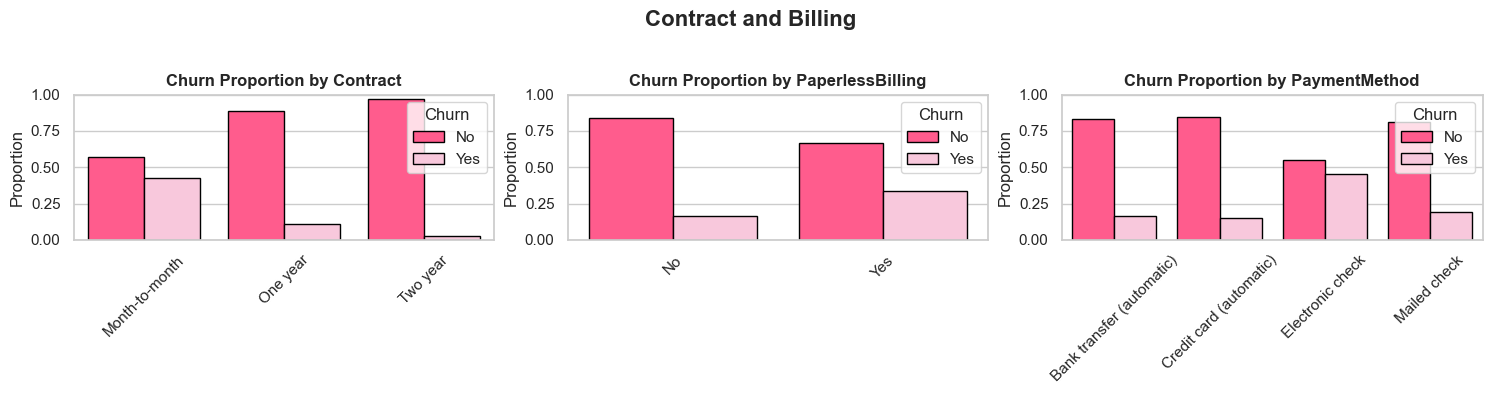

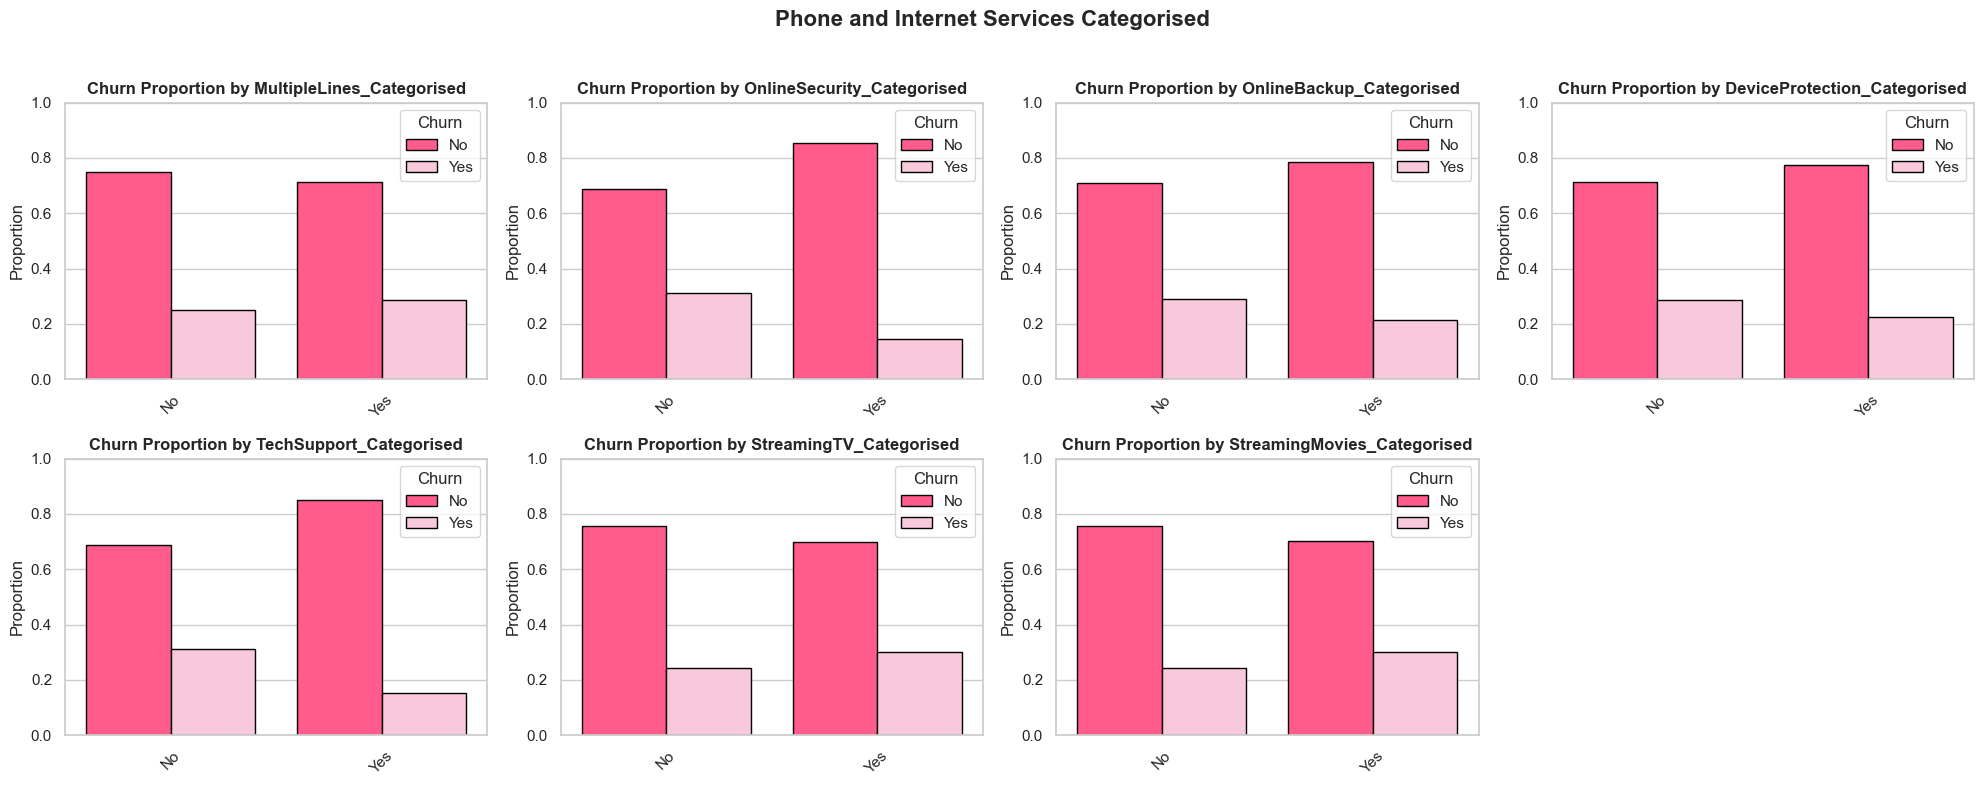

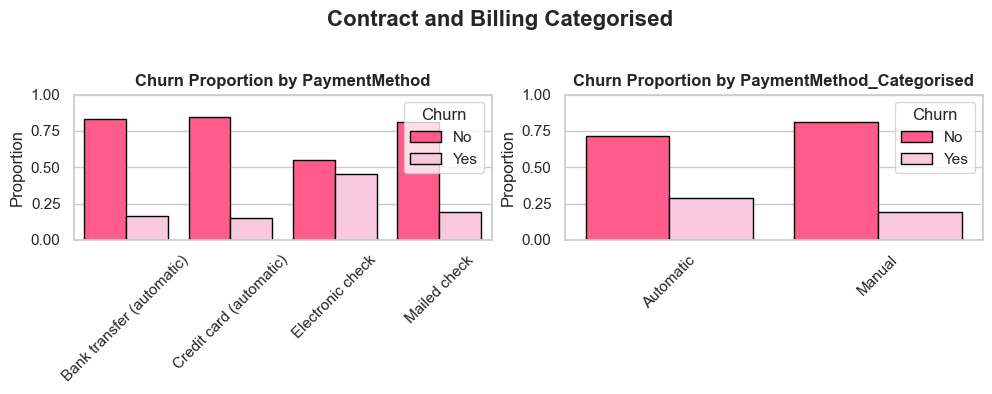

In [25]:
# Define custom color palette 
palette = ['#FF5C8D', '#F8C8DC']

# Set seaborn style
sns.set(style="whitegrid")

# Define groups of related features 
feature_groups = {
    "Demographic Features": ['gender', 'Partner', 'Dependents'],
    "Phone and Internet Services": [
        'PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies'
    ],
    "Contract and Billing": ['Contract', 'PaperlessBilling', 'PaymentMethod'],
    "Phone and Internet Services Categorised":  [
        'MultipleLines_Categorised', 'OnlineSecurity_Categorised', 
        'OnlineBackup_Categorised', 'DeviceProtection_Categorised', 
        'TechSupport_Categorised', 'StreamingTV_Categorised', 
        'StreamingMovies_Categorised'
    ],
    "Contract and Billing Categorised": ['PaymentMethod', 'PaymentMethod_Categorised']
}

# Loop through each group of features 
for group_name, features in feature_groups.items():
    
    # Dynamically pick number of columns
    if len(features) <= 3:
        cols = len(features)     # no wasted empty plots
    elif len(features) <= 6:
        cols = 3                 # 2 rows max
    else:
        cols = 4                 # safe default for larger groups
    
    rows = (len(features) + cols - 1) // cols  # ceiling division for rows
    
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
    axes = np.atleast_1d(axes).flatten()  # flatten to always be iterable

    # Loop through each feature in the group
    for i, feature in enumerate(features):
        proportions = (
            dataset.groupby([feature, 'Churn']).size()
            .unstack(fill_value=0)
        )
        proportions = proportions.div(proportions.sum(axis=1), axis=0).reset_index()

        melted = proportions.melt(
            id_vars=feature,
            value_vars=['No', 'Yes'],
            var_name='Churn',
            value_name='Proportion'
        )

        sns.barplot(
            x=feature,
            y='Proportion',
            hue='Churn',
            data=melted,
            palette=palette,
            ax=axes[i],
            edgecolor='black',
            linewidth=1,
            saturation=1
        )

        axes[i].set_title(f'Churn Proportion by {feature}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Proportion')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].set_ylim(0, 1)

    # Hide unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Add group title
    plt.suptitle(f'{group_name}', fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


**Note: For better storytelling, related features were grouped together**

1. <u>gender:</u> 
- Consistent with stats.
- Shows similar churn rates across male and female.
- Interpretation: Gender may not be a significant predictor of churn.

2. <u>Partner / Dependents:</u> 
- Consistent with stats.
- Higher churn rates for customers without partners/dependents.
- Interpretation: Customers without family ties may churn more.

3. <u>PhoneService / MultipleLines:</u> 
- Consistent with stats
- Slightly higher churn rates for customers with multiple lines and similar churn for those with or without phone service.
- Interpretation: Customers managing multiple lines may face more complexity or costs, contributing to churn. However, simply having phone service does not appear to be a strong indicator on its own.

4. <u>InternetService and Related Features i.e. OnlineSecurity, TechSupport, e.t.c:</u> 
- Consistent with stats
- Expected higher churn for users with fibre optic service, or those without online security or tech support and other internet related features.
- Interpretation: Lack of value-added services correlates with higher churn.

5. <u>Contract:</u> 
- Consistent with stats
- Very predictive. Month-to-month contracts often have higher churn.
- Interpretation: Short contracts lead to higher volatility.

6. <u>PaperlessBilling:</u> 
- Consistent with stats
- Higher churn rates among customers using paperless billing compared to those receiving physical bills.
- Interpretation: Paperless billing users may be more tech-savvy, budget-conscious, or sensitive to digital experiences, making them more likely to churn.
- This is a potentially strong churn predictor. It would be good to keep and encode it (e.g., label encoding).

7. <u>PaymentMethod:</u> 
- Consistent with stats
- Certain methods like Electronic Check often correlate with higher churn.
- Interpretation: Possibly linked to low financial commitment or auto-renewal setup.

8. <u>MultipleLines_Categorised</u> 
- Consistent with stats
- Before: Categories were "No" / "No phone service" / "Yes"; “No phone service” typically had lower churn than the others.
- After: Combining “No phone service” into "No", this raised the "No" group’s retention and shrunk any "Yes" vs "No" difference, leaving only a weak association with churn.

9. <u>OnlineSecurity_Categorised and TechSupport_Categorised:</u> 
- Consistent with stats. 
- Before: Very clear separation—"Yes" had much lower churn; "No" had noticeably higher churn; "No internet service" had the lowest churn of all.
- After: Still protective to have the service (Yes < churn than No), but the difference is smaller because “No internet service” got merged into "No" and raised its retention.

10. <u>OnlineBackup_Categorised and DeviceProtection_Categorised:</u> 
- Consistent with stats.        
- Before: Directionally similar to OnlineSecurity/TechSupport ("No" had higher churn; "Yes" had lower churn; “No internet service” had very low churn).
- After: The signal weakens; the gap between "Yes" and "No" narrows once “No internet service” is folded into "No".

11. <u>StreamingTV_Categorised and StreamingMovies_Categorised:</u> 
- Consistent with stats.
- Before: Much of the “low churn” came from the “No internet service” group; Yes vs No among internet users was closer.
- After: Merging makes "Yes" and "No" look quite similar (in some panels the difference nearly disappears), because the very low-churn “No internet service” customers boosted the "No" bar.

12. <u>PaymentMethod_Categorised:</u> 
- Consistent with stats.
- Before: Certain methods like "Electronic Check" often correlated with higher churn.
- After: This signal becomes less evident once categorised with churn.



**<u>Suggestions for Modelling Stage:</u>** 
1. gender: Low predictive power. May be dropped or label encoded depending on context.

2. Partner/Dependent: These could be good predictors. Include as-is (label encoded).

3. MultipleLines: Keep — may provide weak but helpful signal.

4. PhoneService: Retain for now, but monitor feature importance during modelling. Consider dropping if not useful.

5. InternetService, OnlineSecurity, TechSupport: Consider feature engineering like “has_support = OnlineSecurity OR TechSupport”.

6. InternetService, OnlineSecurity, TechSupport: Potential interaction terms in advanced models.

7. Contract: Important categorical feature. Encode properly (ordinal encoding may help for Contract).

8. PaperlessBilling: This is a potentially strong churn predictor. Keep and encode it (e.g., one-hot).

9. PaymentMethod: Strong candidate feature. Watch for sparse categories during encoding.

10. Categorised Service Features: Keep original levels or create separate flag columns i.e. HasInternet
    - For internet users, retain Yes/No for add-ons (OnlineSecurity, TechSupport, etc.) to preserve strong signals

11. PaymentMethod_Categorised: Consider keeping this feature to see how well the model performs between the two categories.

#### 7.1.3. Visualising numeric correlations with heatmaps

Objectives:
1. Find out which numerical features have strong positive or negative correlations with the target variable 'Churn'.
2. Check if there are clusters of related features.

##### 7.1.3.1. Encoding 'Churn' before including it in the heatmap

In [26]:
# Encode the 'Churn' column
dataset['Churn_Encoded'] = dataset['Churn'].map({'No': 0, 'Yes': 1})

##### 7.1.3.2. Plotting the heatmap to visualise how strongly correlated the features are with 'Churn'

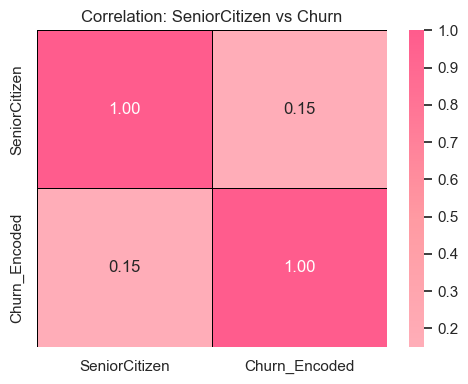

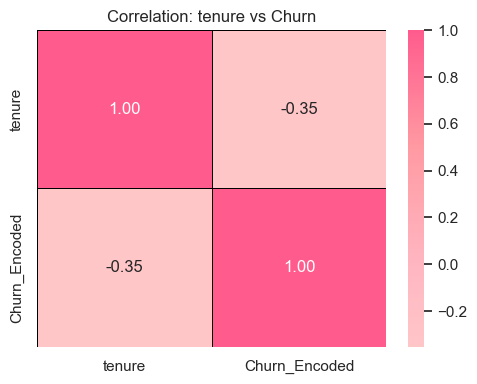

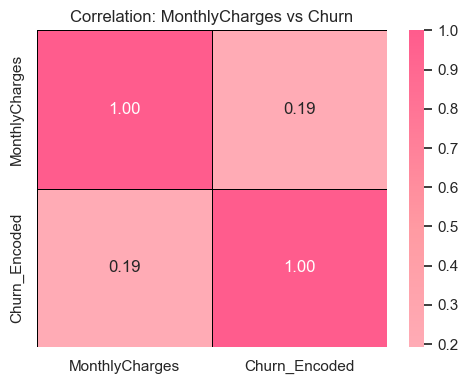

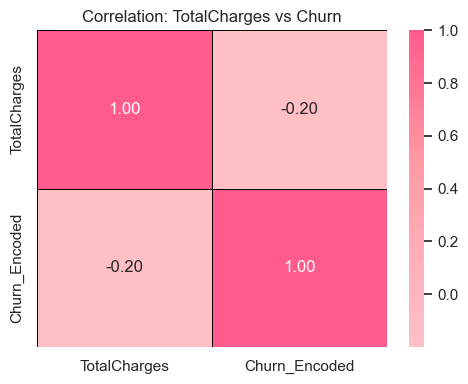

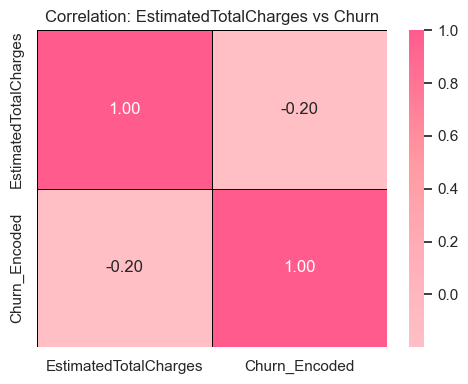

In [27]:
# Define custom colormap for heatmaps 
colours = ["#FFF0F3", '#ffcccb', '#FFB6C1', "#FF9AA2", '#FF5C8D']  

cmap = LinearSegmentedColormap.from_list("soft_pink_orange", colours)
# "#ffb6c1",  "#ff1493", "#FF5C8D", "#F8C8DC"

# Define feature groups to be compared with Churn_Encoded 
split_features = [
    ['SeniorCitizen'],   
    ['tenure'],          
    ['MonthlyCharges'],  
    ['TotalCharges'],
    ['EstimatedTotalCharges']     
]

# Loop through each feature and create its own figure
for subset in split_features:
    corr_matrix = dataset[subset + ['Churn_Encoded']].corr()
    
    plt.figure(figsize=(5,4))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, center=0,
                linewidths=0.5, linecolor='black', cbar=True)  
    
    plt.title(f'Correlation: {subset[0]} vs Churn', fontsize=12)
    plt.tight_layout()
    plt.show()

**<u>General Observations</u>**
- A strong positive correlation is associated with more churn.
- A strong negative correlation is associated with less churn.


**<u>Interpretations Based on Plots</u>**
- <u>SeniorCitizen vs. Churn:</u> **+0.15**
    - Positive correlation means that being a senior citizen is somewhat associated with a higher chance of churn.
    - The value 0.15 is a weak positive correlation, so the relationship exists but is not very strong.

- <u>tenure vs. Churn:</u> **-0.35**
    - Negative correlation means that the longer a customer has stayed (higher tenure), the less likely they are to churn.
    - The value -0.35 shows a moderate negative relationship, so tenure is a fairly important factor in reducing churn risk.

- <u>MonthlyCharges vs. Churn:</u> **+0.19**
    - Positive correlation means customers with higher monthly charges are slightly more likely to churn.
    - The value 0.19 is a weak positive correlation, so it might be a factor but not a very strong one.

- <u>TotalCharges vs. Churn:</u> **-0.20**
    - Negative correlation means that customers who have accumulated more total charges over time tend to churn less.
    - The value -0.20 indicates a weak to moderate negative correlation, suggesting longer, more paying customers tend to stay.

- <u>EstimatedTotalCharges vs. Churn:</u> **-0.20**
    - Thee exact same as 'TotalCharges'.


**<u>Summary</u>**
- SeniorCitizen has a weak positive correlation with churn — senior citizens are slightly more likely to leave.

- Tenure has a moderate negative correlation — longer-tenured customers are less likely to churn.

- MonthlyCharges shows a weak positive correlation — higher monthly charges may increase churn risk a little.

- TotalCharges and EstimatedTotalCharges have a weak to moderate negative correlation — customers with higher total charges tend to stay longer.

##### 7.1.3.3. Plotting the heatmap to visualise how strongly correlated the features are with one another

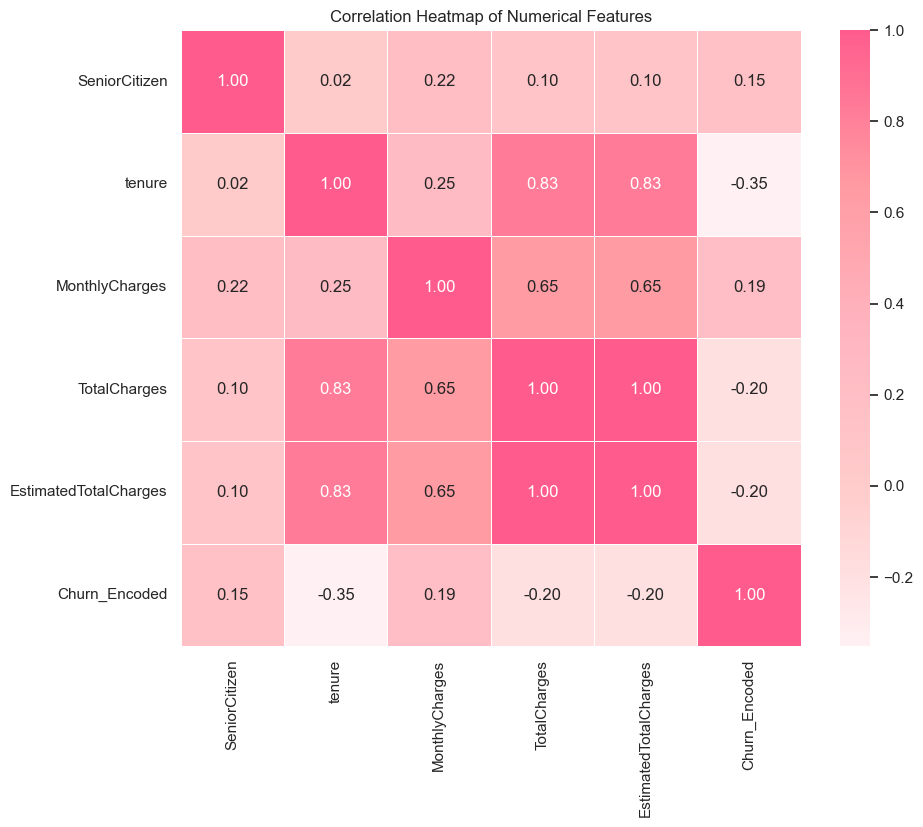

In [28]:
# Define a custom gradient color map for the heatmap visualization 
colours = ["#FFF0F3", '#ffcccb', '#FFB6C1', "#FF9AA2", '#FF5C8D']  
cmap = LinearSegmentedColormap.from_list("soft_pink_orange", colours)

# Select only the names of the numerical columns from the dataset
# numerical_cols_list = dataset.select_dtypes(include='number').drop('EstimatedTotalCharges', axis=1).columns

numerical_cols_list = dataset.select_dtypes(include='number').columns

# Set the figure size for better readability 
plt.figure(figsize=(10, 8))

# Plot a correlation heatmap of the selected numerical features
sns.heatmap(dataset[numerical_cols_list].corr(), annot=True, cmap=cmap, fmt='.2f', linewidths=0.5, linecolor='white')      # color of edge lines (can be black, gray, etc.))

# Add title 
plt.title('Correlation Heatmap of Numerical Features')

# Display the heatmap
plt.show()

**<u>Suggestions for Modelling Stage</u>**
1. Keep all four features as they show correlations with churn and provide predictive value.

2. Use SeniorCitizen as a binary numerical feature directly.

3. Use tenure, MonthlyCharges, TotalCharges, and EstimatedTotalCharges as continuous numerical features and consider scaling them for certain models.

4. Check for missing values and handle appropriately.

5. Consider checking multicollinearity due to high correlation among numerical features, especially TotalCharges and EstimatedTotalCharges.

6. Consider trying feature engineering such as binning tenure for improved modeling.

7. Consider dropping either TotalCharges or EstimatedTotalCharges during modelling.

### 7.2. Visualising correlations between features using scatterplots

Objectives:
1. Spot possible relationships, outliers, or clusters.
2. Find out if churners and non-churners separate into different regions?
3. Confirm if there are any clear patterns, such as high monthly charges leading to more churn

These will be achieved using the results from the correlation heatmap first to find pairs that are highly positively or negatively correlated (e.g., > 0.5 or < -0.5) to plot against one another.

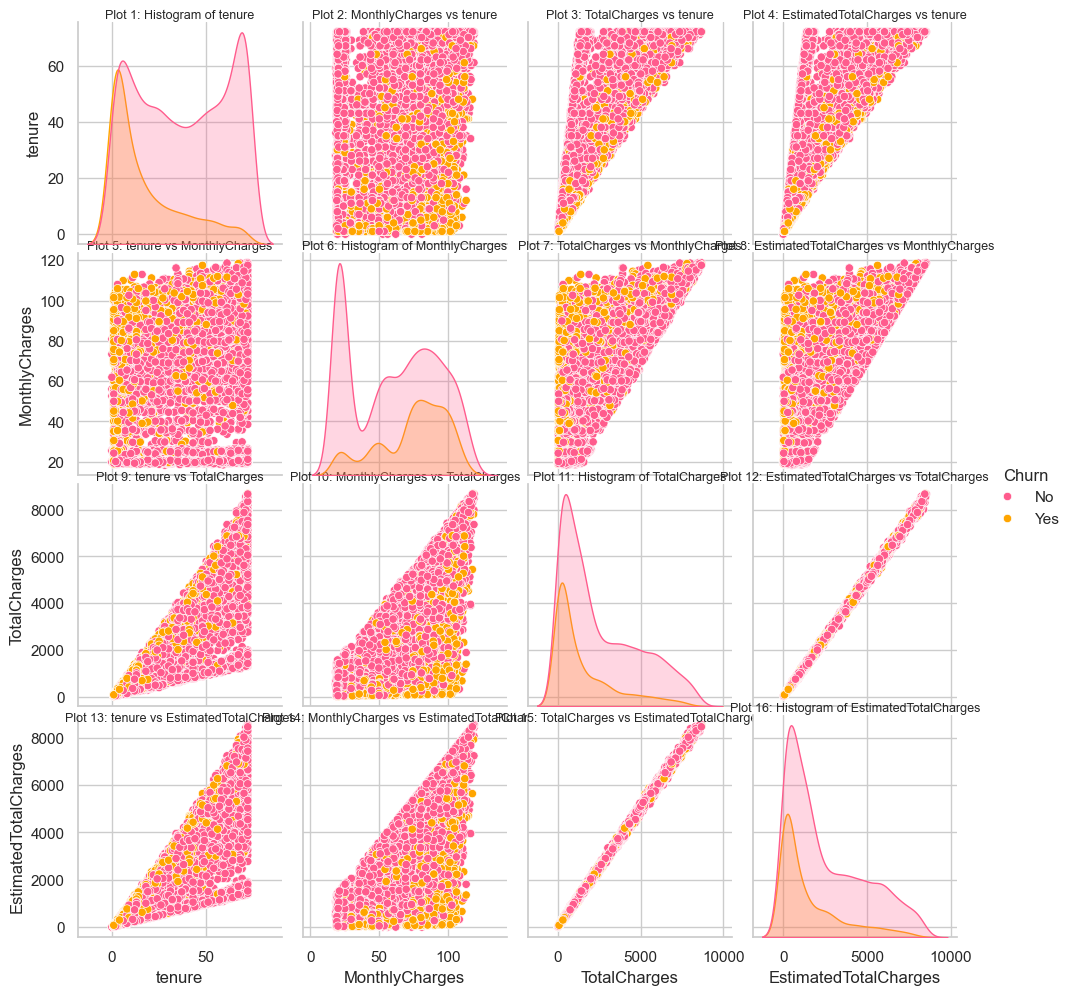

In [29]:
# Define variables to visualize
vars_to_plot = ['tenure', 'MonthlyCharges', 'TotalCharges', 'EstimatedTotalCharges']

# Create a pairplot with scatterplots (off-diagonal) and histograms (diagonal) 
g = sns.pairplot(dataset[vars_to_plot + ['Churn']],
                 hue='Churn',
                 palette={'Yes': '#FFA500', 'No': '#FF5C8D'})

# Add custom titles for each subplot 
# Diagonal plots: histograms of a single variable
# Off-diagonal plots: scatterplots of one variable vs another
subplot_titles = []

# Loop through variables for rows (y-axis)
for i, y_var in enumerate(vars_to_plot):
    row_titles = []
    # Loop through variables for columns (x-axis) 
    for j, x_var in enumerate(vars_to_plot):
        if i == j:
            # If same variable on x and y axis histogram
            title = f"Plot {i*len(vars_to_plot) + j + 1}: Histogram of {x_var}"
        else:
            # Otherwise - scatterplot
            title = f"Plot {i*len(vars_to_plot) + j + 1}: {x_var} vs {y_var}"
        row_titles.append(title)
    subplot_titles.append(row_titles)

# Add the titles to each subplot in the pairplot
for i in range(len(vars_to_plot)):
    for j in range(len(vars_to_plot)):
        ax = g.axes[i, j]  # Get subplot at row i, col j
        # Place the custom title above the subplot
        ax.set_title(subplot_titles[i][j], fontsize=9, pad=-5)

# Display the final plot
plt.show()

**<u>Interpretation of the Pairplots</u>**

<u>Plot 1: Histogram of tenure</u>
- Observation: Churned customers are heavily concentrated at low tenure values.
- Interpretation: Tenure is strongly related to churn — early customers are much more likely to churn.
- Modeling suggestion: 
    - Keep tenure as a key feature.
    - Consider engineering a binary “new_customer” feature (e.g., tenure < 6 months) to capture early churn risk more explicitly.

<u>Plot 2: MonthlyCharges vs tenure</u>
- Observation: Churners with low tenure tend to have higher monthly charges.
- Interpretation: MonthlyCharges interacts with tenure in predicting churn; high charges early on increase churn risk.
- Modeling suggestion: Keep MonthlyCharges and consider creating interaction terms (e.g., MonthlyCharges × new_customer) to capture this relationship.

<u>Plots 3 and 4: TotalCharges/EstimatedTotalCharges vs tenure</u>
- Observation: TotalCharges/EstimatedTotalCharges correlates with tenure but churners have low total charges due to short tenure.
- Interpretation: TotalCharges/EstimatedTotalCharges alone partly reflects tenure and early churn.
- Modeling suggestion: Keep TotalCharges, but beware of multicollinearity with tenure; consider using regularization or combining with tenure into a feature like average charges per month (TotalCharges / tenure).
- Consider dropping EstimatedTotalCharges 

<u>Plot 5: tenure vs MonthlyCharges</u>
- Observation: Similar to Plot 2 — churners cluster in low tenure with high MonthlyCharges.
- Interpretation: Confirms interaction effect.
- Modeling suggestion: Same as Plot 2: keep MonthlyCharges and tenure, engineer interaction features.

<u>Plot 6: Histogram of MonthlyCharges</u>
- Observation: Churners skew towards higher monthly charges.
- Interpretation: MonthlyCharges is a predictive feature for churn.
- Modeling suggestion: Keep MonthlyCharges as-is; if distribution is skewed, consider transformation (e.g., log) or binning to capture non-linear effects.

<u>Plots 7 and 8: TotalCharges/EstimatedTotalCharges vs MonthlyCharges</u>
- Observation: Churners have low total charges despite similar MonthlyCharges, reflecting short tenure.
- Interpretation: Combining TotalCharges/EstimatedTotalCharges and MonthlyCharges may help identify early churn.
- Modeling suggestion: Engineer features like average monthly spend or charge rate consistency; keep both variables (TotalCharges and MonthlyCharges) but watch for redundancy.

<u>Plots 9 and 13: tenure vs TotalCharges/EstimatedTotalCharges</u>
- Observation: Strong positive correlation, churners concentrated at low tenure and low total charges.
- Interpretation: Tenure, TotalCharges and EstimatedTotalCharges provide overlapping information.
- Modeling suggestion: Consider dimensionality reduction or feature engineering (e.g., ratio features) to reduce redundancy but keep both initially (tenure and TotalCharges).

<u>Plots 10 and 14: MonthlyCharges vs TotalCharges/EstimatedTotalCharges</u>
- Observation: Similar to Plots 7 and 8; churners have lower total charges despite comparable monthly charges.
- Interpretation: Confirms that total accumulated charges reflect customer lifespan.
- Modeling suggestion: Same as Plots 7 and 8 — keep both, engineer combined features, check correlations.

<u>Plots 11 and 16: Histograms of TotalCharges and EstimatedTotalCharges</u>
- Observation: TotalCharges/EstimatedTotalCharges are right-skewed with many churners at low values.
- Interpretation: TotalCharges/EstimatedTotalCharges are predictive but skewed.
- Modeling suggestion: Consider log-transforming or binning TotalCharges and EstimatedTotalCharges to handle skewness and improve model performance.

<u>Plots 12 and 15: Histograms of TotalCharges and EstimatedTotalCharges</u>
- Plots are perfectly collinear.

**<u>Summary of the Pairplot Interpretations</u>**

- Keep all three variables — tenure, MonthlyCharges, and TotalCharges — as they all carry important churn information.
- Engineer interaction and ratio features (e.g., tenure-based flags, average charges).
- Consider transformations (log, binning) to address skewness and non-linearity.
- Monitor multicollinearity between tenure and TotalCharges; use regularization or dimensionality reduction if needed.
- Avoid dropping these variables initially since they provide complementary predictive power for churn.
- Consider dropping EstimatedTotalCharges and engineer a new feature that captures these discrepancies better. i.e. ChargeDifference

## 8. Segment Analysis

This section will divide numerical features into categories and group them by churn rates.

In [30]:
# Define numerical columns in the dataset
num_features = dataset.select_dtypes(include=['number']).columns.tolist()

# Define bin ranges (intervals) for selected numerical features
bins_dict = {
    'tenure': [0, 12, 24, 48, 72],  # Group customers by their tenure in months
    'MonthlyCharges': [0, 35, 70, 105, 140],  # Group by monthly charges spent
    'TotalCharges': [0, 500, 1500, 3500, 6000]  # Group by total charges paid
}

# Define labels for each bin range per feature
labels_dict = {
    'tenure': ['0-12', '13-24', '25-48', '49-72'],
    'MonthlyCharges': ['0-35', '36-70', '71-105', '106-140'],
    'TotalCharges': ['0-500', '501-1500', '1501-3500', '3501-6000']
}

# Loop through all numerical features
for feature in num_features:
    # Only apply binning if the feature has a defined bin range in bins_dict
    if feature in bins_dict:
        # Create a new column with grouped categories for the feature
        dataset[f'{feature}_group'] = pd.cut(
            dataset[feature],              
            bins=bins_dict[feature],       
            labels=labels_dict[feature],   
            include_lowest=True            
        )

        print(f"Churn rate by {feature}_group:")
        print(dataset.groupby(f'{feature}_group')['Churn']
                    .value_counts(normalize=True)   
                    .unstack())                    
        print("\n" + "="*50 + "\n")  

Churn rate by tenure_group:
Churn               No       Yes
tenure_group                    
0-12          0.525618  0.474382
13-24         0.712891  0.287109
25-48         0.796110  0.203890
49-72         0.904868  0.095132


Churn rate by MonthlyCharges_group:
Churn                       No       Yes
MonthlyCharges_group                    
0-35                  0.891066  0.108934
36-70                 0.760580  0.239420
71-105                0.621860  0.378140
106-140               0.791506  0.208494


Churn rate by TotalCharges_group:
Churn                     No       Yes
TotalCharges_group                    
0-500               0.585500  0.414500
501-1500            0.751957  0.248043
1501-3500           0.763176  0.236824
3501-6000           0.840722  0.159278




/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_80967/2385741583.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(dataset.groupby(f'{feature}_group')['Churn']
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_80967/2385741583.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(dataset.groupby(f'{feature}_group')['Churn']
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_80967/2385741583.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obser

**<u>General Observations and Conclusions</u>**

**1. Customers with tenure between 0 to 12 months exhibit the highest churn rate, confirming that newer customers are more likely to leave.**

- This suggests that newer customers tend to leave more often than those who have been with the company longer.

    - It could mean customers aren’t fully satisfied or their expectations aren’t met early on.

    - It might also point to onboarding or early service issues — if customers have a bad initial experience, they churn more quickly.

    - Alternatively, it could mean some customers might just be trying the service but don’t find it valuable enough to stay.

<u>Implication:</u> The company should focus on improving the first-year experience to reduce early churn, such as better onboarding, clearer communication, or targeted offers.




**2. Customers with monthly charges in the $71 to $105 range show the highest churn rates compared to other price groups.**

This suggests:
- Price sensitivity: Customers paying in this mid-to-high price range might feel the service is not worth the cost, leading them to churn more frequently.

- Value perception: These customers might expect better service or more features for the higher monthly charges, and if their expectations aren’t met, they may decide to leave.

- Competitive alternatives: Customers in this price segment could be more tempted by competitors offering similar or better services at a lower price, causing higher churn.

- Billing surprise: If these charges are higher than they expected or variable, it might create dissatisfaction.

<u>Implication:</u> The company should investigate the needs and experiences of these customers and consider tailored retention strategies such as enhanced features, improved service quality, or targeted promotions to increase perceived value and loyalty.




**3. Customers with lower total charges (0-500) tend to have a higher churn rate, and the churn rate decreases as total charges increase, suggesting that customers who have spent more overall are less likely to churn.**

This suggests:

- Customers who have spent less total money with the company tend to leave more often.

    - This could be because they are less invested or less engaged with the service.

- Higher total charges usually indicate longer tenure or more usage, so these customers might be more loyal or satisfied.

- Low total charges might also correspond to short tenure customers, who churn more frequently (which matches the first bullet point).

<u>Implication:</u> Encouraging customers to engage more or increasing their usage might help improve retention, as more invested customers are less likely to churn.

## End of exploratory data analysis.